## Final Project Submission

Please fill out:
* Student name: Dicchyant Gurung
* Student pace: Self paced
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:https://dicchyanttamu.wixsite.com/data/post/different-ways-to-normalize-distribution-of-data


### Solution

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_raw = pd.read_csv('kc_house_data.csv')
df_raw.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

### Step 1: Clean the data

In [3]:
df_raw.rename(columns=lambda x: x.title(), inplace=True)
df_raw.head()

Id        Date     Price  Bedrooms  Bathrooms  Sqft_Living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   Sqft_Lot  Floors  Waterfront  View  ...  Grade  Sqft_Above  Sqft_Basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  Yr_Built  Yr_Renovated  Zipcode      Lat     Long  Sqft_Living15  Sqft_Lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
df_raw.rename(columns={'Date':'Date Sold'}, inplace=True)
df_raw.head()

Id   Date Sold     Price  Bedrooms  Bathrooms  Sqft_Living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   Sqft_Lot  Floors  Waterfront  View  ...  Grade  Sqft_Above  Sqft_Basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  Yr_Built  Yr_Renovated  Zipcode      Lat     Long  Sqft_Living15  Sqft_Lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

### Look for missing values

In [5]:
df = df_raw.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             21597 non-null  int64  
 1   Date Sold      21597 non-null  object 
 2   Price          21597 non-null  float64
 3   Bedrooms       21597 non-null  int64  
 4   Bathrooms      21597 non-null  float64
 5   Sqft_Living    21597 non-null  int64  
 6   Sqft_Lot       21597 non-null  int64  
 7   Floors         21597 non-null  float64
 8   Waterfront     19221 non-null  float64
 9   View           21534 non-null  float64
 10  Condition      21597 non-null  int64  
 11  Grade          21597 non-null  int64  
 12  Sqft_Above     21597 non-null  int64  
 13  Sqft_Basement  21597 non-null  object 
 14  Yr_Built       21597 non-null  int64  
 15  Yr_Renovated   17755 non-null  float64
 16  Zipcode        21597 non-null  int64  
 17  Lat            21597 non-null  float64
 18  Long  

In [7]:
df.isnull().sum()

Id                  0
Date Sold           0
Price               0
Bedrooms            0
Bathrooms           0
Sqft_Living         0
Sqft_Lot            0
Floors              0
Waterfront       2376
View               63
Condition           0
Grade               0
Sqft_Above          0
Sqft_Basement       0
Yr_Built            0
Yr_Renovated     3842
Zipcode             0
Lat                 0
Long                0
Sqft_Living15       0
Sqft_Lot15          0
dtype: int64

In [8]:
df.Waterfront.value_counts()

0.0    19075
1.0      146
Name: Waterfront, dtype: int64

'Waterfront' seems to be a categorical column with 0 as no waterfront and 1 as waterfront available. Since, the majority of the houses does not seem to have a waterfront, we will assume that the missing values also does not have a waterfront. 

We will replace the missing values with zero.

In [9]:
df.View.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: View, dtype: int64

'View' is another categorcial column with values from 0 to 4. Since the majority of the data points towards 0 for not viewed, we are going to assume that the houses with missing values have also not been viewed.

We will replace the missing values with zero.

In [10]:
df.Yr_Renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: Yr_Renovated, Length: 70, dtype: int64

'Yr_Renovated' has 17011 values as 0. This means that majority of the houses have not been renovated in our data set. We will also assume here that none of the houses with missing values have been renovated.

We will replace the missing values with zero.

In [11]:
df.fillna(0, inplace=True)

In [12]:
df.isnull().sum()

Id               0
Date Sold        0
Price            0
Bedrooms         0
Bathrooms        0
Sqft_Living      0
Sqft_Lot         0
Floors           0
Waterfront       0
View             0
Condition        0
Grade            0
Sqft_Above       0
Sqft_Basement    0
Yr_Built         0
Yr_Renovated     0
Zipcode          0
Lat              0
Long             0
Sqft_Living15    0
Sqft_Lot15       0
dtype: int64

In [13]:
df.Yr_Renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: Yr_Renovated, Length: 70, dtype: int64

Majority of the houses are not renovated and since the renovated values account to less than 10% of the total dataset, we will be dropping this column as a predictor for our model.

In [14]:
df.drop(['Yr_Renovated'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             21597 non-null  int64  
 1   Date Sold      21597 non-null  object 
 2   Price          21597 non-null  float64
 3   Bedrooms       21597 non-null  int64  
 4   Bathrooms      21597 non-null  float64
 5   Sqft_Living    21597 non-null  int64  
 6   Sqft_Lot       21597 non-null  int64  
 7   Floors         21597 non-null  float64
 8   Waterfront     21597 non-null  float64
 9   View           21597 non-null  float64
 10  Condition      21597 non-null  int64  
 11  Grade          21597 non-null  int64  
 12  Sqft_Above     21597 non-null  int64  
 13  Sqft_Basement  21597 non-null  object 
 14  Yr_Built       21597 non-null  int64  
 15  Zipcode        21597 non-null  int64  
 16  Lat            21597 non-null  float64
 17  Long           21597 non-null  float64
 18  Sqft_L

In [16]:
df.head()

Id   Date Sold     Price  Bedrooms  Bathrooms  Sqft_Living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   Sqft_Lot  Floors  Waterfront  View  Condition  Grade  Sqft_Above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

  Sqft_Basement  Yr_Built  Zipcode      Lat     Long  Sqft_Living15  \
0           0.0      1955    98178  47.5112 -122.257           1340   
1         400.0      1951    98125  47.7210 -122.319           1690   
2           0.0      1933    98028  47.7379 -122.233           2720   
3         910.0      1965    98136  47.5208 -122.393           1360   
4           0.0      1987    98074  47.6168 -122.045           1800   

   Sqft_Lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

Column 'Lat' and 'Long' represents the location of the houses. We will use the Zipcode column for this model to account for location.

Lat and Long will be dropped.

In [17]:
df.drop(['Lat', 'Long'], axis=1, inplace=True)
df.head()

Id   Date Sold     Price  Bedrooms  Bathrooms  Sqft_Living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   Sqft_Lot  Floors  Waterfront  View  Condition  Grade  Sqft_Above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

  Sqft_Basement  Yr_Built  Zipcode  Sqft_Living15  Sqft_Lot15  
0           0.0      1955    98178           1340        5650  
1         400.0      1951    98125           1690        7639  
2           0.0      1933    98028           2720        8062  
3         910.0      1965    98136           1360        5000  
4           0.0      1987    98074           1800        7503

### Step 2: Pre-Process the data

Since we are about to split continuous and categorical values. It'll be a good idea to make the 'Id' column an index such that if we have to join column later, we can do it with complete accuracy.

In [18]:
df1 = df.set_index('Id', drop=True).copy()

### Identify categorical and continuous variables

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

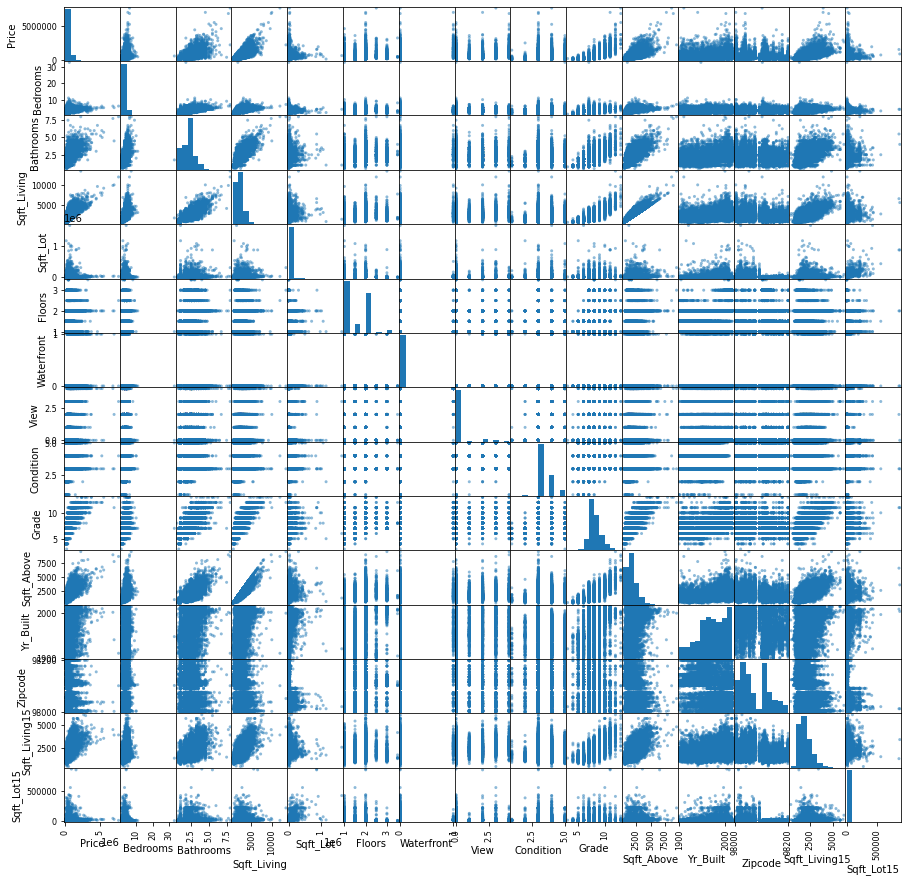

In [20]:
pd.plotting.scatter_matrix(df1, figsize=(15,15))
plt.savefig('D:\Data Science\Module_2_Final_Project\Images\scatter_matrix.png');

Scatter matrix allows us to quickly spot continuous vs categorical values. Categorical values will have a non-continuous and distinct patterns which is seen here mostly in the middle of the scatter-plot. Continuous values will have a linear and continous spread of data trending towards one direction. Let's get a more clearer graph to classify each variable.

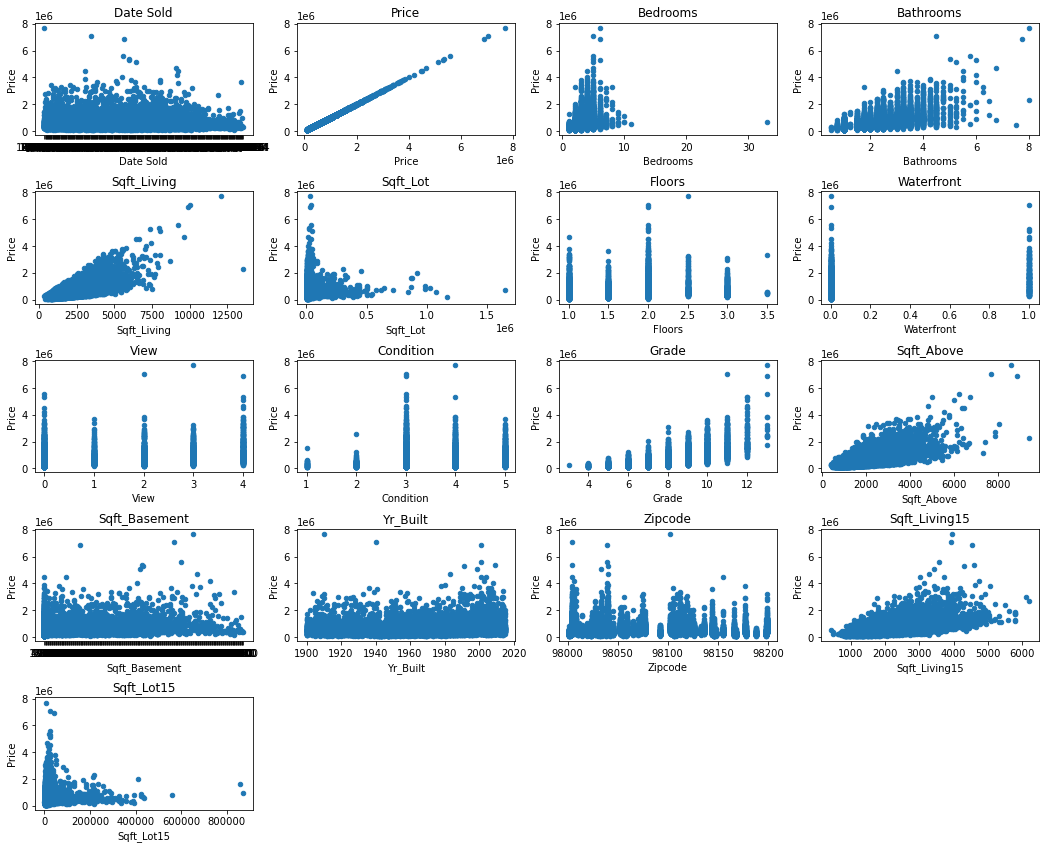

In [21]:
plt.figure(figsize=(18,30))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(df1):
    ax = plt.subplot(10, 4, index+1)
    df1.plot(value, 'Price', ax=ax, kind='scatter', legend=False)
    ax.set_title(value);

In [22]:
continuous = ['Price', 'Sqft_Living', 'Sqft_Lot', 'Sqft_Above', 'Sqft_Basement', 'Sqft_Living15', 'Sqft_Lot15']
categoricals = ['Date Sold', 'Bedrooms', 'Bathrooms', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade', 'Yr_Built', 'Zipcode']

### Continuous Variables

In [23]:
continuous_df = df1[continuous].copy()

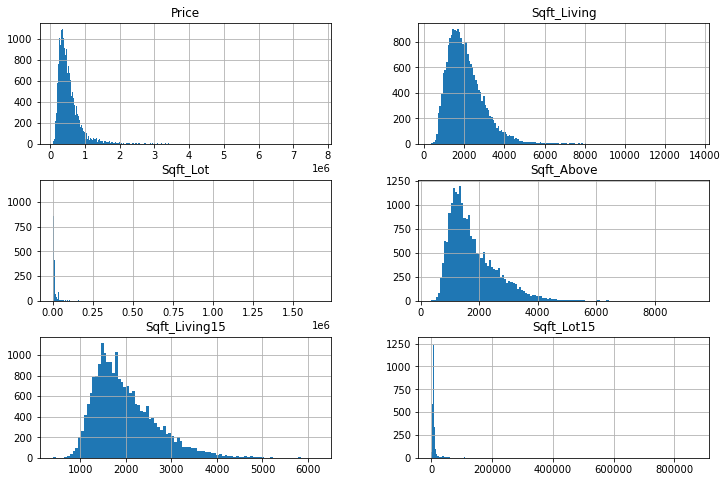

In [24]:
continuous_df.hist(figsize=(12,8), bins='auto')
plt.savefig('D:\Data Science\Module_2_Final_Project\Images\continuous1.png', bbox_inches='tight');

The basement plot is also missing. Let's see what happened here.

In [25]:
continuous_df.Sqft_Basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1798.0        1
2310.0        1
556.0         1
266.0         1
588.0         1
Name: Sqft_Basement, Length: 304, dtype: int64

In [26]:
type(continuous_df.Sqft_Basement.values[0])

str

There is a unique character '?' in Sqft_Basement and also the values are recorded as string. We will have to remove the character and also convert the values to a number format(float).

Instead of removing the whole row with data from all other predictors, we will just replace ? with zero values.

In [27]:
for i in continuous_df.Sqft_Basement.values:
    if i == '?':
        continuous_df.Sqft_Basement.replace(i, '0.0', inplace=True)

In [28]:
continuous_df.Sqft_Basement.value_counts(sort=True)

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1798.0        1
2310.0        1
556.0         1
266.0         1
588.0         1
Name: Sqft_Basement, Length: 303, dtype: int64

Now, let's change all values to a number format.

In [29]:
for i in continuous_df.Sqft_Basement.values:
    continuous_df.Sqft_Basement.replace(i, float(i), inplace=True)

In [30]:
type(continuous_df.Sqft_Basement.values[0])

numpy.float64

Looking at the histogram again.

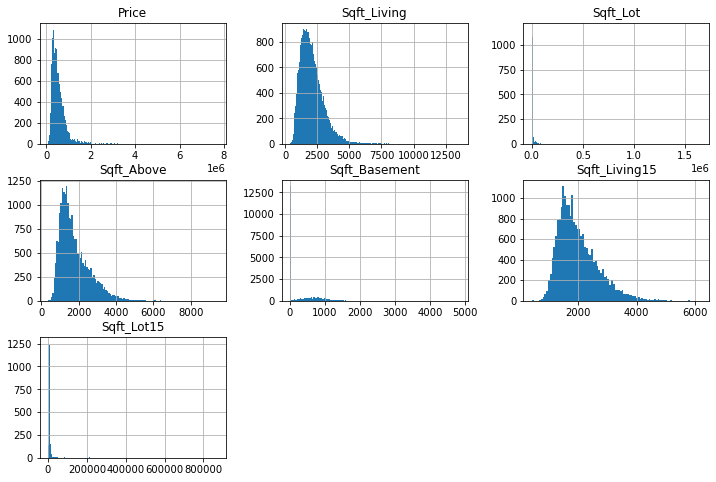

In [31]:
continuous_df.hist(figsize=(12,8), bins='auto');

We have all the plots now.

You can alse see in the above histograms that the continuous varables are postively skewed with outliers on the higher end of the values.

Let's remove the outliers to make the data more normal.

### Remove Outliers

Let's create a box plot to check for outliers

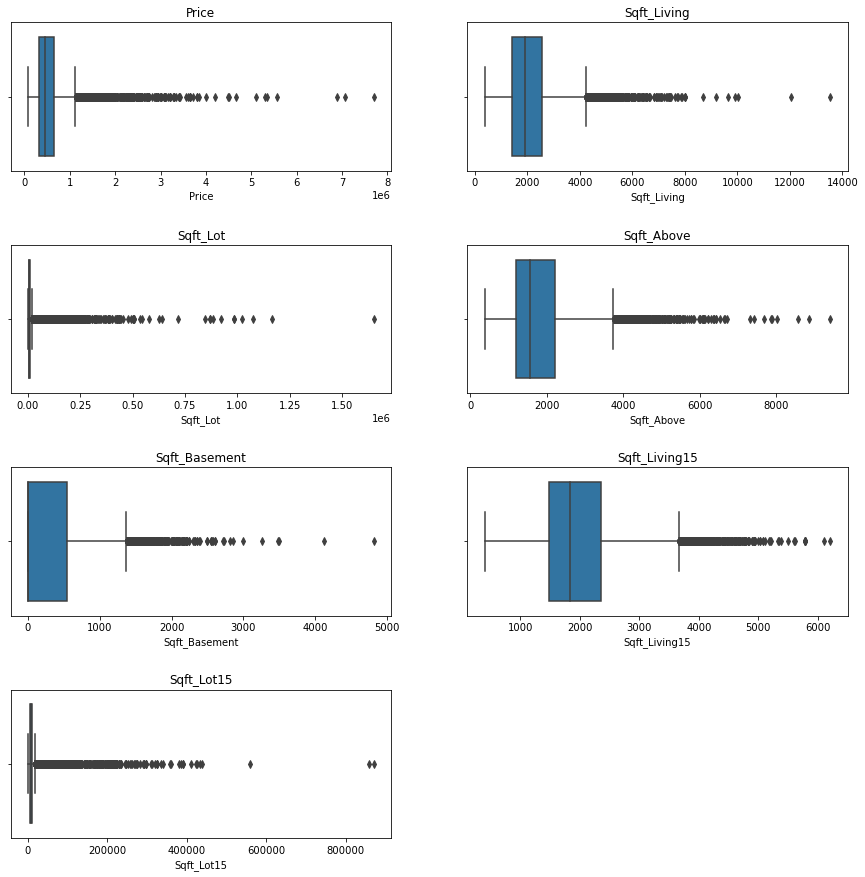

In [32]:
import seaborn as sns

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(continuous_df):
    ax = plt.subplot(4, 2, index+1)
    sns.boxplot(ax=ax, x=continuous_df[value])
    ax.set_title(value)

Scatter plot also helps spot out outliers.

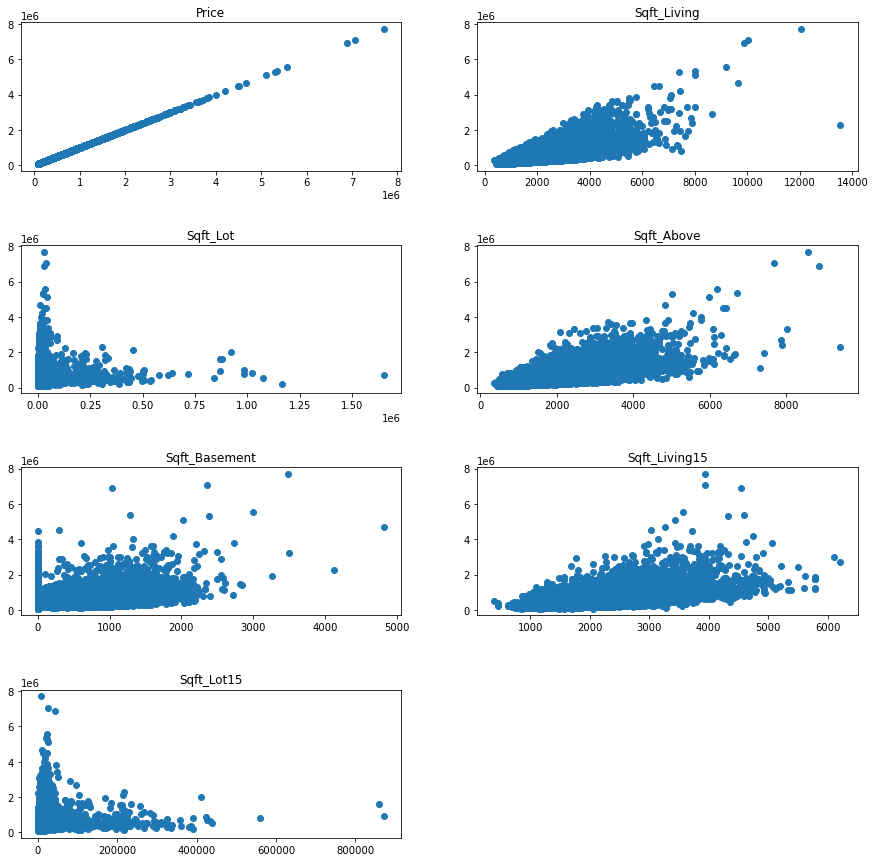

In [33]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(continuous_df):
    ax = plt.subplot(4, 2, index+1)
    ax.scatter(x=continuous_df[value], y=continuous_df['Price'])
    ax.set_title(value)

We're going to use z-score to identify and remove outliers.

### Z-Score

In [34]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(continuous_df))

In [35]:
cont_df_o = continuous_df[(z < 3).all(axis=1)]

In [36]:
cont_df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20341 entries, 7129300520 to 1523300157
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          20341 non-null  float64
 1   Sqft_Living    20341 non-null  int64  
 2   Sqft_Lot       20341 non-null  int64  
 3   Sqft_Above     20341 non-null  int64  
 4   Sqft_Basement  20341 non-null  float64
 5   Sqft_Living15  20341 non-null  int64  
 6   Sqft_Lot15     20341 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


Let's do the box-plot again.

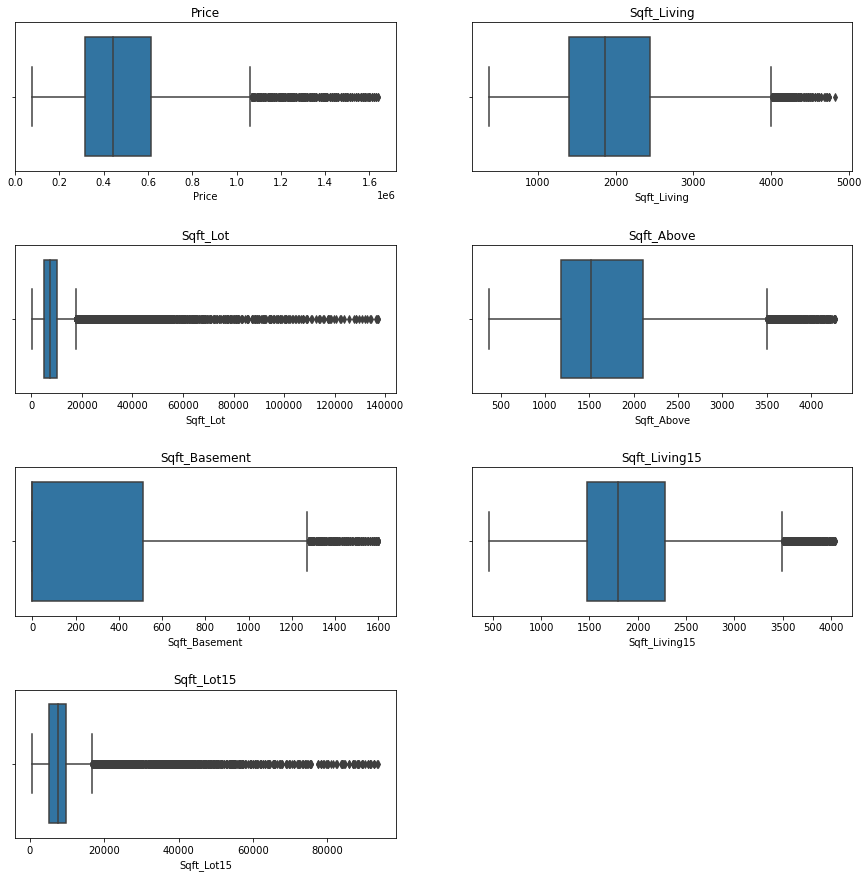

In [37]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(cont_df_o):
    ax = plt.subplot(4, 2, index+1)
    sns.boxplot(ax=ax, x=cont_df_o[value])
    ax.set_title(value)

We can see a lot of improvement in the distribution. However, there are still a lot of outlying data that are extended towards the right of the box plot.

Let's plot this again on a scatter-plot.

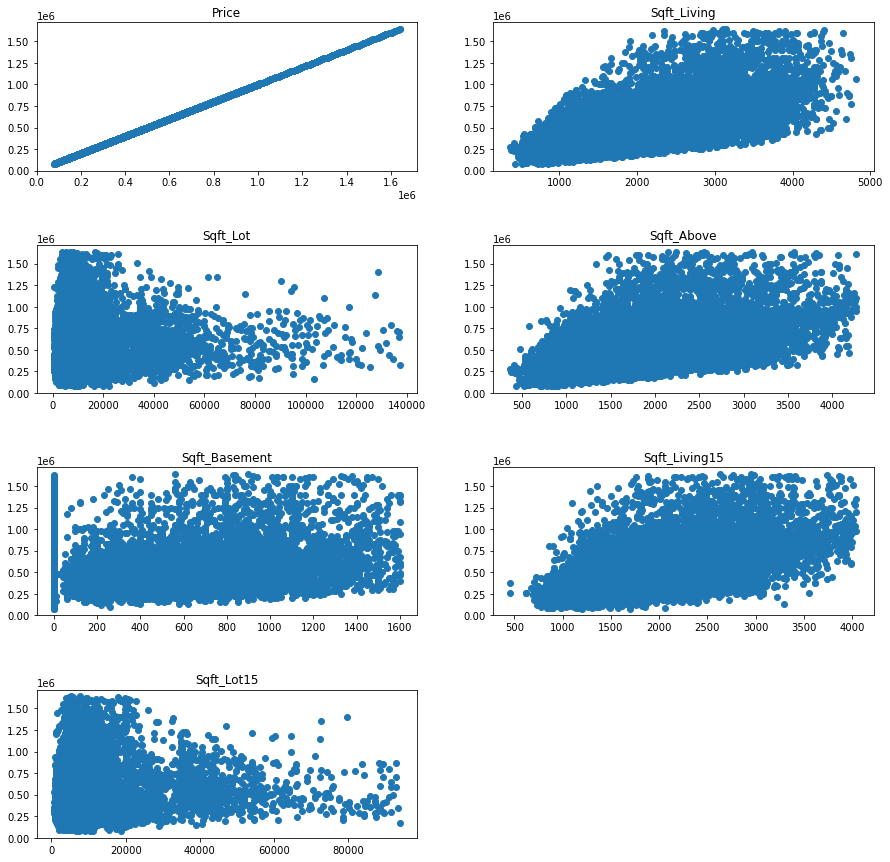

In [38]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(cont_df_o):
    ax = plt.subplot(4, 2, index+1)
    ax.scatter(x=cont_df_o[value], y=cont_df_o['Price'])
    ax.set_title(value)

The scatter plot confirms the sparsity as the data increases in value.

Box-plot uses the inter-quartile range to plot the data. Anything over Q3 + 1.5 IQR is shown as outliers.

In [39]:
for predictor in cont_df_o.columns:
    Q1 = cont_df_o[predictor].quantile(0.25)
    Q3 = cont_df_o[predictor].quantile(0.75)
    IQR = Q3 - Q1
    Outliers = Q3 + (1.5 * IQR)
    print (predictor, ':', Outliers)

Price : 1065000.0
Sqft_Living : 4000.0
Sqft_Lot : 17580.0
Sqft_Above : 3505.0
Sqft_Basement : 1275.0
Sqft_Living15 : 3495.0
Sqft_Lot15 : 16717.5


Let's remove all values over Q3.

In [40]:
dfc = cont_df_o.copy()

In [41]:
cont_df_final = dfc[(dfc.Price < 1000000) & (dfc.Sqft_Living < 4000) & (dfc.Sqft_Lot < 18000) &
                    (dfc.Sqft_Above < 3500) & (dfc.Sqft_Basement < 1275) & (dfc.Sqft_Living15 < 3500) & 
                    (dfc.Sqft_Lot15 < 17000)].copy()

In [42]:
cont_df_final.head()

Price  Sqft_Living  Sqft_Lot  Sqft_Above  Sqft_Basement  \
Id                                                                       
7129300520  221900.0         1180      5650        1180            0.0   
6414100192  538000.0         2570      7242        2170          400.0   
5631500400  180000.0          770     10000         770            0.0   
2487200875  604000.0         1960      5000        1050          910.0   
1954400510  510000.0         1680      8080        1680            0.0   

            Sqft_Living15  Sqft_Lot15  
Id                                     
7129300520           1340        5650  
6414100192           1690        7639  
5631500400           2720        8062  
2487200875           1360        5000  
1954400510           1800        7503

Let's check the new dataframe on the box-plot again.

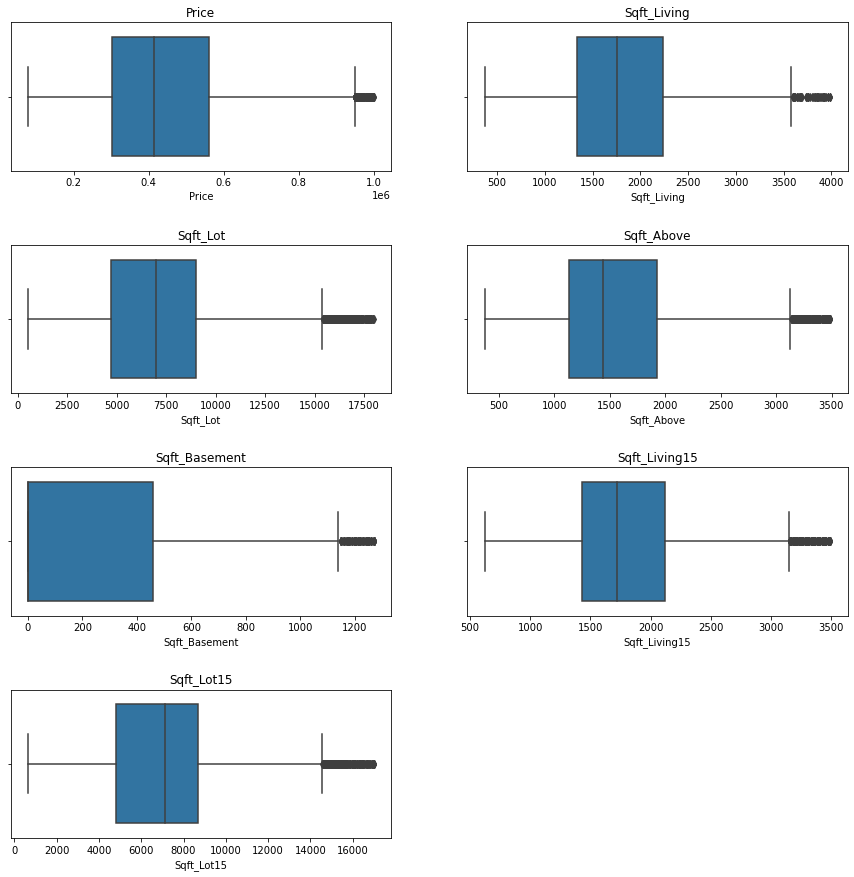

In [43]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(cont_df_final):
    ax = plt.subplot(4, 2, index+1)
    sns.boxplot(ax=ax, x=cont_df_final[value])
    ax.set_title(value)

### Scatter plot

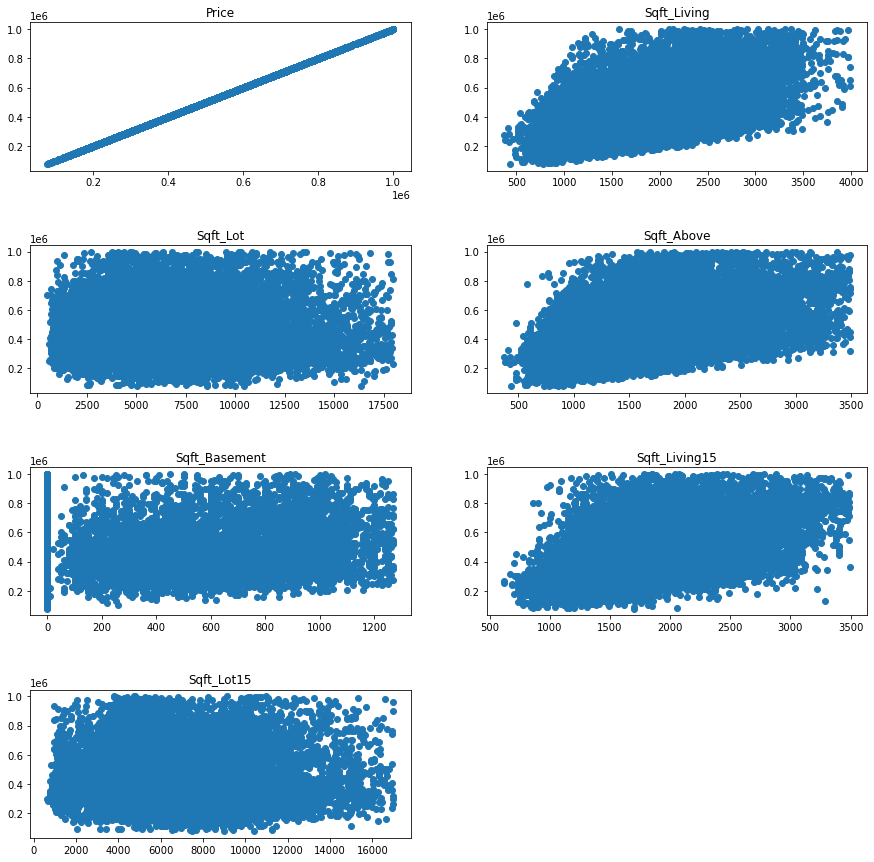

In [44]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(cont_df_final):
    ax = plt.subplot(4, 2, index+1)
    ax.scatter(x=cont_df_final[value], y=cont_df_final['Price'])
    ax.set_title(value)

Our plot show much improvement in the distribution of the data.

Finally, plotting this on a histogram.

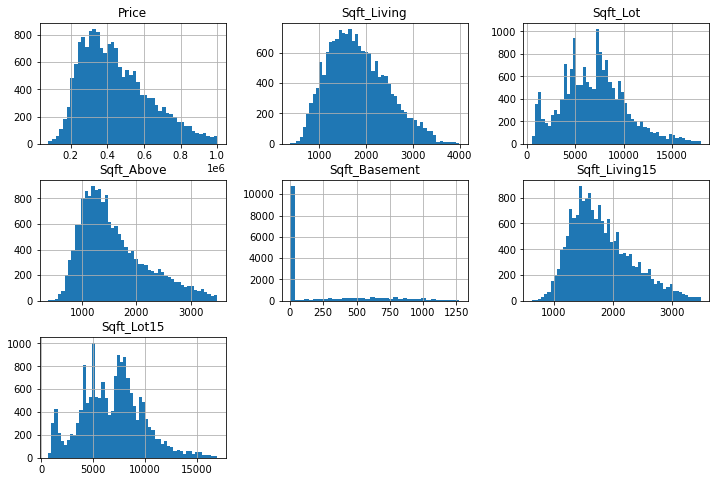

In [45]:
cont_df_final.hist(figsize=(12,8), bins='auto')
plt.savefig('D:\Data Science\Module_2_Final_Project\Images\continuous2.png', bbox_inches='tight');

Our final dataset now looks much better for continuous variables.

However, the Sqft_Basement still has high positive skewness as too many houses does not have a basement. 

In [46]:
cont_df_final.Sqft_Basement.value_counts()

0.0      10793
600.0      189
500.0      189
700.0      175
800.0      162
         ...  
172.0        1
243.0        1
225.0        1
516.0        1
602.0        1
Name: Sqft_Basement, Length: 163, dtype: int64

In [47]:
cont_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17022 entries, 7129300520 to 1523300157
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          17022 non-null  float64
 1   Sqft_Living    17022 non-null  int64  
 2   Sqft_Lot       17022 non-null  int64  
 3   Sqft_Above     17022 non-null  int64  
 4   Sqft_Basement  17022 non-null  float64
 5   Sqft_Living15  17022 non-null  int64  
 6   Sqft_Lot15     17022 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.0 MB


For our total dataset of 17022 rows, we have 10793 houses with no basement. This means that around 7000 houses have a basement. Since the split is almost 50/50 for having a basement and not having a basement, we will change this into a categorical predictor with 'Basement' and 'No Basement' to capture its value.

In [48]:
for i in cont_df_final.Sqft_Basement.values:
    if i > 0:
        cont_df_final.Sqft_Basement.replace(i, 1, inplace=True)

In [49]:
cont_df_final

Price  Sqft_Living  Sqft_Lot  Sqft_Above  Sqft_Basement  \
Id                                                                       
7129300520  221900.0         1180      5650        1180            0.0   
6414100192  538000.0         2570      7242        2170            1.0   
5631500400  180000.0          770     10000         770            0.0   
2487200875  604000.0         1960      5000        1050            1.0   
1954400510  510000.0         1680      8080        1680            0.0   
...              ...          ...       ...         ...            ...   
263000018   360000.0         1530      1131        1530            0.0   
6600060120  400000.0         2310      5813        2310            0.0   
1523300141  402101.0         1020      1350        1020            0.0   
291310100   400000.0         1600      2388        1600            0.0   
1523300157  325000.0         1020      1076        1020            0.0   

            Sqft_Living15  Sqft_Lot15  
Id                                     
7129300520           1340        5650  
6414100192           1690        7639  
5631500400           2720        8062  
2487200875           1360        5000  
1954400510           1800        7503  
...                   ...         ...  
263000018            1530        1509  
6600060120           1830        7200  
1523300141           1020        2007  
291310100            1410        1287  
1523300157           1020        1357  

[17022 rows x 7 columns]

Since 0 and 1 are binary values. We will not have to transform the Sqft_Basement columns. We will leave this and move ahead with our pre-processing.

### Categorical variables

In [50]:
categoricals = ['Date Sold', 'Bedrooms', 'Bathrooms', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade', 'Yr_Built', 'Zipcode']

In [51]:
categorical_df = df1[categoricals].copy()

In [52]:
categorical_df.head()

Date Sold  Bedrooms  Bathrooms  Floors  Waterfront  View  \
Id                                                                      
7129300520  10/13/2014         3       1.00     1.0         0.0   0.0   
6414100192   12/9/2014         3       2.25     2.0         0.0   0.0   
5631500400   2/25/2015         2       1.00     1.0         0.0   0.0   
2487200875   12/9/2014         4       3.00     1.0         0.0   0.0   
1954400510   2/18/2015         3       2.00     1.0         0.0   0.0   

            Condition  Grade  Yr_Built  Zipcode  
Id                                               
7129300520          3      7      1955    98178  
6414100192          3      7      1951    98125  
5631500400          3      6      1933    98028  
2487200875          5      7      1965    98136  
1954400510          3      8      1987    98074

Let's check all the unique values in each column.

In [53]:
for i in categorical_df.columns:
    print (i +':', len(categorical_df[i].value_counts()))

Date Sold: 372
Bedrooms: 12
Bathrooms: 29
Floors: 6
Waterfront: 2
View: 5
Condition: 5
Grade: 11
Yr_Built: 116
Zipcode: 70


Let's futher check the distribution of classes in each column.

In [54]:
for i in categorical_df.columns:
    print (i + ': \n')
    print (categorical_df[i].value_counts().sort_values(ascending=False))
    print ('\n')

Date Sold: 

6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
11/2/2014      1
1/17/2015      1
5/15/2015      1
7/27/2014      1
2/15/2015      1
Name: Date Sold, Length: 372, dtype: int64


Bedrooms: 

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: Bedrooms, dtype: int64


Bathrooms: 

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: Bathrooms, dtype: int64


Floors: 

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: Floors, dtype: int64


Waterfront: 

0.0    21451
1.0      146
N

Visualizing the data on a scatter plot.

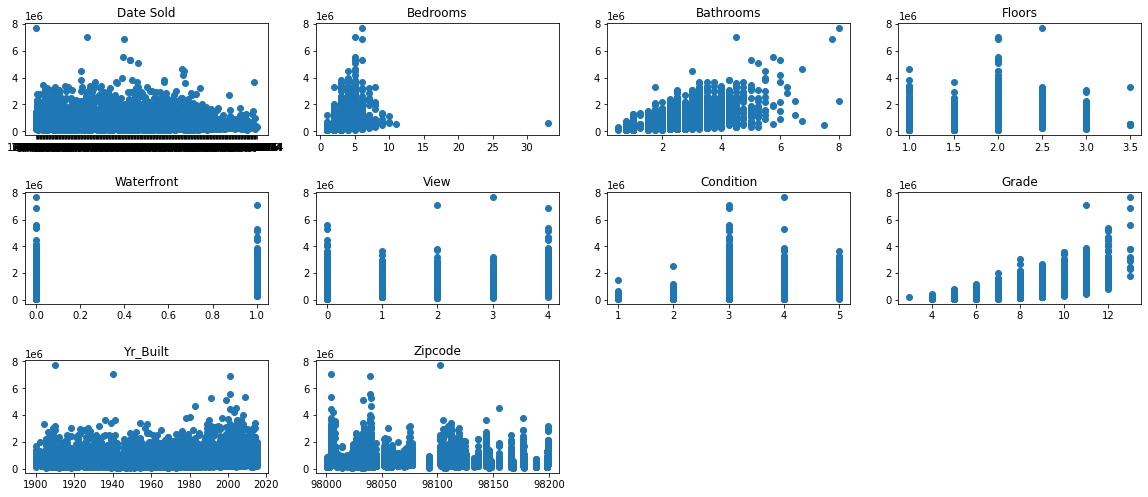

In [55]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(categorical_df):
    ax = plt.subplot(10, 4, index+1)
    ax.scatter(x=categorical_df[value], y=df1['Price'])
    ax.set_title(value);
plt.savefig('D:\Data Science\Module_2_Final_Project\Images\categorical1.png', bbox_inches='tight');

From the above graph, we can see that 'DateSold', 'Yr_Built', and 'Zipcode' are true categorical values while the rest are ordinal. There are also a lot of outliers present in the data, which needs to be removed.

In [56]:
ordinal = ['Bedrooms', 'Bathrooms', 'Floors', 'View', 'Condition', 'Grade']

In [57]:
ordinal_df = categorical_df[ordinal]

In [58]:
ordinal_df

Bedrooms  Bathrooms  Floors  View  Condition  Grade
Id                                                             
7129300520         3       1.00     1.0   0.0          3      7
6414100192         3       2.25     2.0   0.0          3      7
5631500400         2       1.00     1.0   0.0          3      6
2487200875         4       3.00     1.0   0.0          5      7
1954400510         3       2.00     1.0   0.0          3      8
...              ...        ...     ...   ...        ...    ...
263000018          3       2.50     3.0   0.0          3      8
6600060120         4       2.50     2.0   0.0          3      8
1523300141         2       0.75     2.0   0.0          3      7
291310100          3       2.50     2.0   0.0          3      8
1523300157         2       0.75     2.0   0.0          3      7

[21597 rows x 6 columns]

The ordinal variables have an order so we do not need to convert them into dummy variables. However, we can reduce the variability among each with some z-score calculation.

### Z-Score

In [59]:
z2 = np.abs(stats.zscore(ordinal_df))
print(z2)

[[0.40290302 1.45107268 0.91555234 0.30494873 0.62998644 0.56080027]
 [0.40290302 0.17448579 0.93743087 0.30494873 0.62998644 0.56080027]
 [1.48249316 1.45107268 0.91555234 0.30494873 0.62998644 1.41318983]
 ...
 [1.48249316 1.77618438 0.93743087 0.30494873 0.62998644 0.56080027]
 [0.40290302 0.49959749 0.93743087 0.30494873 0.62998644 0.2915893 ]
 [1.48249316 1.77618438 0.93743087 0.30494873 0.62998644 0.56080027]]


In [60]:
ordinal_df_o = ordinal_df[(z2 < 3).all(axis=1)]

In [61]:
ordinal_df_o

Bedrooms  Bathrooms  Floors  View  Condition  Grade
Id                                                             
7129300520         3       1.00     1.0   0.0          3      7
6414100192         3       2.25     2.0   0.0          3      7
5631500400         2       1.00     1.0   0.0          3      6
2487200875         4       3.00     1.0   0.0          5      7
1954400510         3       2.00     1.0   0.0          3      8
...              ...        ...     ...   ...        ...    ...
263000018          3       2.50     3.0   0.0          3      8
6600060120         4       2.50     2.0   0.0          3      8
1523300141         2       0.75     2.0   0.0          3      7
291310100          3       2.50     2.0   0.0          3      8
1523300157         2       0.75     2.0   0.0          3      7

[20476 rows x 6 columns]

In [62]:
ordinal_df_o.shape

(20476, 6)

The Z-score method seems to have removed about 1000 values. Let's plot this on a box-plot to see if we still see any more outliers.

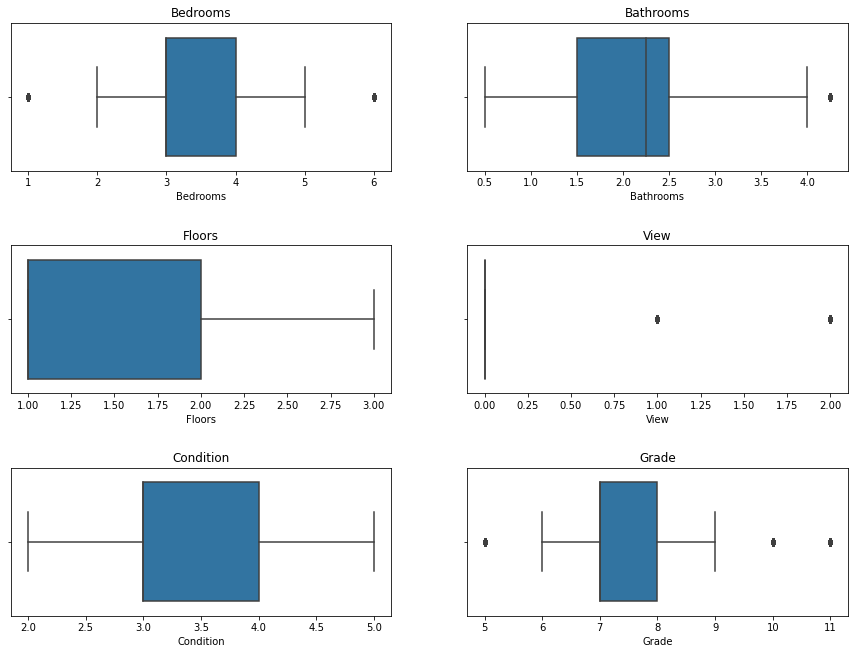

In [63]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(ordinal_df_o):
    ax = plt.subplot(4, 2, index+1)
    sns.boxplot(ax=ax, x=ordinal_df_o[value])
    ax.set_title(value)

### Scatter plot

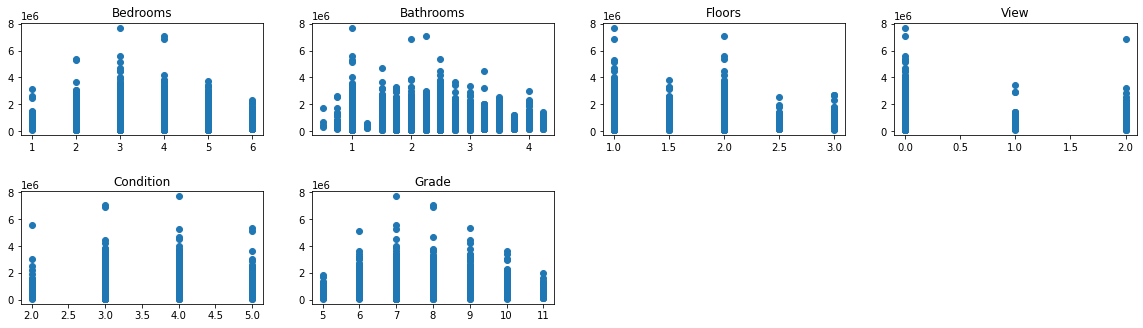

In [64]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(ordinal_df_o):
    ax = plt.subplot(10, 4, index+1)
    ax.scatter(x=ordinal_df_o[value], y=df1['Price'][:20476])
    ax.set_title(value);
plt.savefig('D:\Data Science\Module_2_Final_Project\Images\categorical2.png', bbox_inches='tight');

Both box-plot and scatter plot show presense of some outliers in the data.

Let's use our IQR technique again to spot the outliers.

In [65]:
for predictor in ordinal_df_o.columns:
    Q1 = ordinal_df_o[predictor].quantile(0.25)
    Q3 = ordinal_df_o[predictor].quantile(0.75)
    IQR = Q3 - Q1
    outliers_a = Q1 - (1.5 * IQR)
    outliers_b = Q3 + (1.5 * IQR)
    print (predictor, ':', outliers_a, '-', outliers_b)

Bedrooms : 1.5 - 5.5
Bathrooms : 0.0 - 4.0
Floors : -0.5 - 3.5
View : 0.0 - 0.0
Condition : 1.5 - 5.5
Grade : 5.5 - 9.5


Let's keep all values for now to capture all features in each variable.

Now, we will have to process the rest of the categorical columns. For these, we will create ranges for each.

### Create ranges for categories

In [66]:
categorical_df.head()

Date Sold  Bedrooms  Bathrooms  Floors  Waterfront  View  \
Id                                                                      
7129300520  10/13/2014         3       1.00     1.0         0.0   0.0   
6414100192   12/9/2014         3       2.25     2.0         0.0   0.0   
5631500400   2/25/2015         2       1.00     1.0         0.0   0.0   
2487200875   12/9/2014         4       3.00     1.0         0.0   0.0   
1954400510   2/18/2015         3       2.00     1.0         0.0   0.0   

            Condition  Grade  Yr_Built  Zipcode  
Id                                               
7129300520          3      7      1955    98178  
6414100192          3      7      1951    98125  
5631500400          3      6      1933    98028  
2487200875          5      7      1965    98136  
1954400510          3      8      1987    98074

### 1. Date Sold

In [67]:
cat_df = categorical_df[['Date Sold', 'Yr_Built', 'Zipcode', 'Waterfront']].copy()

In [68]:
years = []
for i in cat_df['Date Sold'].values:
    years.append(i[-4:])

In [69]:
cat_df['Year_Sold'] = years

In [70]:
cat_df.head()

Date Sold  Yr_Built  Zipcode  Waterfront Year_Sold
Id                                                             
7129300520  10/13/2014      1955    98178         0.0      2014
6414100192   12/9/2014      1951    98125         0.0      2014
5631500400   2/25/2015      1933    98028         0.0      2015
2487200875   12/9/2014      1965    98136         0.0      2014
1954400510   2/18/2015      1987    98074         0.0      2015

In [71]:
cat_df.Year_Sold.value_counts()

2014    14622
2015     6975
Name: Year_Sold, dtype: int64

There only seems to be 2 years representing date sold. There are enough data on both so we will keep this for our model.

In [72]:
cat_df.drop('Date Sold', axis=1, inplace=True)

### 2. Year Built

In [73]:
cat_df.Yr_Built.min()

1900

In [74]:
cat_df.Yr_Built.max()

2015

In [75]:
diff = 2015 - 1900
diff

115

In [76]:
diff/10

11.5

If we group them by 10 years each, we will have about 10 columns. Let's create groups of 10.

In [77]:
Yr_Built_Range = ['2015-2006', '2005-1996', '1995-1986', '1985-1976', '1975-1966',
                  '1965-1956', '1955-1946', '1945-1936', '1935-1926', '1925 and below']

In [78]:
year_df = cat_df.copy()

In [79]:
for i in year_df['Yr_Built']:
    if i > 2005:
        year_df['Yr_Built'].replace({i:'2006-2015'}, inplace=True)
    elif i <= 2005 & i > 1996:
        year_df['Yr_Built'].replace({i:'1996-2005'}, inplace=True)
    elif i <= 1995 & i > 1986:
        year_df['Yr_Built'].replace({i:'1986-1995'}, inplace=True)
    elif i <= 1985 & i > 1976:
        year_df['Yr_Built'].replace({i:'1976-1985'}, inplace=True)
    elif i <= 1975 & i > 1966:
        year_df['Yr_Built'].replace({i:'1966-1975'}, inplace=True)
    elif i <= 1965 & i > 1956:
        year_df['Yr_Built'].replace({i:'1956-1965'}, inplace=True)
    elif i <= 1955 & i > 1946:
        year_df['Yr_Built'].replace({i:'1946-1955'}, inplace=True)
    elif i <= 1945 & i > 1936:
        year_df['Yr_Built'].replace({i:'1936-1945'}, inplace=True)
    elif i <= 1935 & i > 1926:
        year_df['Yr_Built'].replace({i:'1926-1936'}, inplace=True)
    else:
        year_df['Yr_Built'].replace({i:'1925 and below'}, inplace=True)

In [80]:
year_df.Yr_Built.value_counts()

1925 and below    11400
2006-2015          2708
1966-1975          1546
1996-2005          1406
1986-1995          1112
1956-1965          1029
1946-1955          1018
1926-1936           619
1976-1985           456
1936-1945           303
Name: Yr_Built, dtype: int64

In [81]:
year_df.head()

Yr_Built  Zipcode  Waterfront Year_Sold
Id                                                       
7129300520       1946-1955    98178         0.0      2014
6414100192  1925 and below    98125         0.0      2014
5631500400       1926-1936    98028         0.0      2015
2487200875       1956-1965    98136         0.0      2014
1954400510       1986-1995    98074         0.0      2015

### EDA 1: Effect of time on house price

We can use the groups of date built to check for house price trends as we move along the years.

In [82]:
year_built_price = pd.DataFrame(year_df.Yr_Built).join(df1.Price, on='Id')

In [83]:
year_built_price.sort_values(by='Yr_Built')

Yr_Built     Price
Id                                  
269000030   1925 and below  976000.0
7961500010  1925 and below  520000.0
4463400195  1925 and below  170000.0
7961500010  1925 and below  245000.0
8123450300  1925 and below  508000.0
...                    ...       ...
8562780160       2006-2015  334950.0
8682292190       2006-2015  850000.0
5631500292       2006-2015  600000.0
5424100030       2006-2015  327555.0
1523300157       2006-2015  325000.0

[21953 rows x 2 columns]

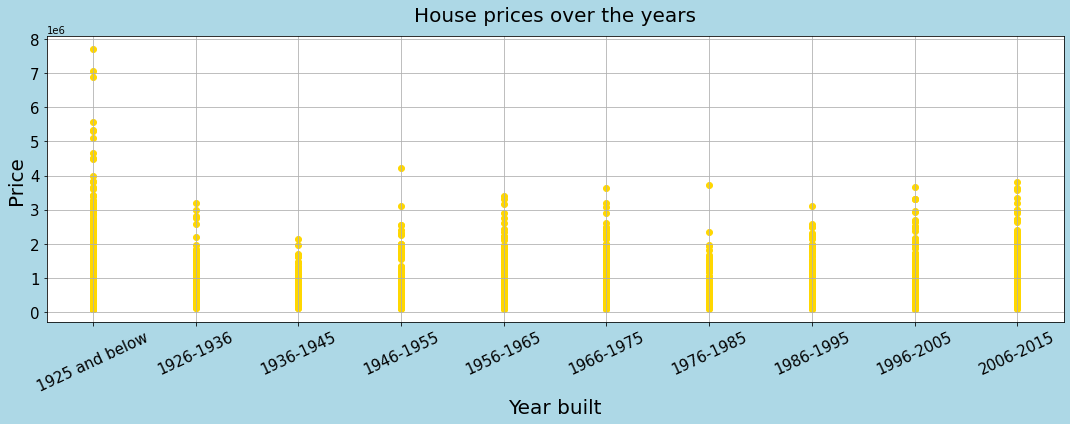

In [84]:
fig = plt.figure(figsize=(15,6), facecolor='lightblue')

plt.scatter(x=year_built_price.Yr_Built.sort_values(), y=year_built_price.Price, c='gold')
plt.title('House prices over the years', fontsize=(20), pad=15)
plt.ylabel('Price', fontsize=(20))
plt.xlabel('Year built', fontsize=(20))
plt.xticks(rotation=25, fontsize=(15))
plt.yticks(fontsize=15)
plt.grid()
fig.tight_layout();
plt.savefig('D:\Data Science\Module_2_Final_Project\Images\year_built.png')

Here we can see that a lot of old houses are priced much higher than the new ones. There are some fluctuations in the middle, however they stay more or less the same. 

We will have to wait for the regression to confirm the impact of house age on the final price.

### 3. Zipcode

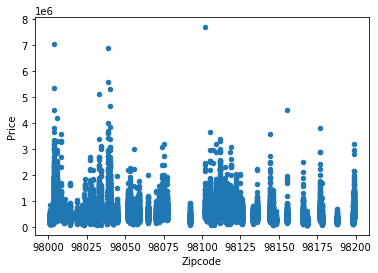

In [85]:
df1.plot.scatter('Zipcode', 'Price');

In [86]:
year_df.Zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: Zipcode, Length: 70, dtype: int64

There are about 70 zipcodes. We will keep these for now as each zipcode might contribute to a certain value for a house.

In [87]:
year_df.shape

(21597, 4)

Let's create dummy variables for these ranges before we merge them with ordinal columns.

### One-hot Encoding

In [88]:
column_names = year_df.columns.to_list()

In [89]:
cat_ohe = pd.get_dummies(year_df, columns=column_names, drop_first=True)

In [90]:
cat_ohe.head()

Yr_Built_1926-1936  Yr_Built_1936-1945  Yr_Built_1946-1955  \
Id                                                                       
7129300520                   0                   0                   1   
6414100192                   0                   0                   0   
5631500400                   1                   0                   0   
2487200875                   0                   0                   0   
1954400510                   0                   0                   0   

            Yr_Built_1956-1965  Yr_Built_1966-1975  Yr_Built_1976-1985  \
Id                                                                       
7129300520                   0                   0                   0   
6414100192                   0                   0                   0   
5631500400                   0                   0                   0   
2487200875                   1                   0                   0   
1954400510                   0                   0                   0   

            Yr_Built_1986-1995  Yr_Built_1996-2005  Yr_Built_2006-2015  \
Id                                                                       
7129300520                   0                   0                   0   
6414100192                   0                   0                   0   
5631500400                   0                   0                   0   
2487200875                   0                   0                   0   
1954400510                   1                   0                   0   

            Zipcode_98002  ...  Zipcode_98155  Zipcode_98166  Zipcode_98168  \
Id                         ...                                                
7129300520              0  ...              0              0              0   
6414100192              0  ...              0              0              0   
5631500400              0  ...              0              0              0   
2487200875              0  ...              0              0              0   
1954400510              0  ...              0              0              0   

            Zipcode_98177  Zipcode_98178  Zipcode_98188  Zipcode_98198  \
Id                                                                       
7129300520              0              1              0              0   
6414100192              0              0              0              0   
5631500400              0              0              0              0   
2487200875              0              0              0              0   
1954400510              0              0              0              0   

            Zipcode_98199  Waterfront_1.0  Year_Sold_2015  
Id                                                         
7129300520              0               0               0  
6414100192              0               0               0  
5631500400              0               0               1  
2487200875              0               0               0  
1954400510              0               0               1  

[5 rows x 80 columns]

We have 79 new columns, which are a separate instance for each class within each category.

Let's merge these with the ordinal value to create our final categorical dataset.

In [91]:
cat_df_final = pd.merge(ordinal_df_o, cat_ohe, how='inner', on='Id')

In [92]:
cat_df_final.head()

Bedrooms  Bathrooms  Floors  View  Condition  Grade  \
Id                                                                
7129300520         3       1.00     1.0   0.0          3      7   
6414100192         3       2.25     2.0   0.0          3      7   
5631500400         2       1.00     1.0   0.0          3      6   
2487200875         4       3.00     1.0   0.0          5      7   
1954400510         3       2.00     1.0   0.0          3      8   

            Yr_Built_1926-1936  Yr_Built_1936-1945  Yr_Built_1946-1955  \
Id                                                                       
7129300520                   0                   0                   1   
6414100192                   0                   0                   0   
5631500400                   1                   0                   0   
2487200875                   0                   0                   0   
1954400510                   0                   0                   0   

            Yr_Built_1956-1965  ...  Zipcode_98155  Zipcode_98166  \
Id                              ...                                 
7129300520                   0  ...              0              0   
6414100192                   0  ...              0              0   
5631500400                   0  ...              0              0   
2487200875                   1  ...              0              0   
1954400510                   0  ...              0              0   

            Zipcode_98168  Zipcode_98177  Zipcode_98178  Zipcode_98188  \
Id                                                                       
7129300520              0              0              1              0   
6414100192              0              0              0              0   
5631500400              0              0              0              0   
2487200875              0              0              0              0   
1954400510              0              0              0              0   

            Zipcode_98198  Zipcode_98199  Waterfront_1.0  Year_Sold_2015  
Id                                                                        
7129300520              0              0               0               0  
6414100192              0              0               0               0  
5631500400              0              0               0               1  
2487200875              0              0               0               0  
1954400510              0              0               0               1  

[5 rows x 86 columns]

In [93]:
cat_df_final.shape

(20816, 86)

Finally, let's create our preprocessed dataframe by merging the continuous with transformed categorical values.

In [94]:
preprocessed = pd.merge(cont_df_final, cat_df_final, how='inner', on='Id')

In [95]:
preprocessed.head()

Price  Sqft_Living  Sqft_Lot  Sqft_Above  Sqft_Basement  \
Id                                                                       
7129300520  221900.0         1180      5650        1180            0.0   
6414100192  538000.0         2570      7242        2170            1.0   
5631500400  180000.0          770     10000         770            0.0   
2487200875  604000.0         1960      5000        1050            1.0   
1954400510  510000.0         1680      8080        1680            0.0   

            Sqft_Living15  Sqft_Lot15  Bedrooms  Bathrooms  Floors  ...  \
Id                                                                  ...   
7129300520           1340        5650         3       1.00     1.0  ...   
6414100192           1690        7639         3       2.25     2.0  ...   
5631500400           2720        8062         2       1.00     1.0  ...   
2487200875           1360        5000         4       3.00     1.0  ...   
1954400510           1800        7503         3       2.00     1.0  ...   

            Zipcode_98155  Zipcode_98166  Zipcode_98168  Zipcode_98177  \
Id                                                                       
7129300520              0              0              0              0   
6414100192              0              0              0              0   
5631500400              0              0              0              0   
2487200875              0              0              0              0   
1954400510              0              0              0              0   

            Zipcode_98178  Zipcode_98188  Zipcode_98198  Zipcode_98199  \
Id                                                                       
7129300520              1              0              0              0   
6414100192              0              0              0              0   
5631500400              0              0              0              0   
2487200875              0              0              0              0   
1954400510              0              0              0              0   

            Waterfront_1.0  Year_Sold_2015  
Id                                          
7129300520               0               0  
6414100192               0               0  
5631500400               0               1  
2487200875               0               0  
1954400510               0               1  

[5 rows x 93 columns]

In [96]:
preprocessed.shape

(17593, 93)

Before we run a regression, we need to check for multicollinearity between the predictors.

### Step 3: Check for Multicollinearity

### Correlation Matrix

In [97]:
preprocessed.corr()

Price  Sqft_Living  Sqft_Lot  Sqft_Above  Sqft_Basement  \
Price           1.000000     0.539616 -0.077862    0.437222       0.173220   
Sqft_Living     0.539616     1.000000  0.175407    0.839986       0.174560   
Sqft_Lot       -0.077862     0.175407  1.000000    0.141822      -0.036136   
Sqft_Above      0.437222     0.839986  0.141822    1.000000      -0.306386   
Sqft_Basement   0.173220     0.174560 -0.036136   -0.306386       1.000000   
...                  ...          ...       ...         ...            ...   
Zipcode_98188  -0.077931    -0.019728  0.058288   -0.026308      -0.005099   
Zipcode_98198  -0.119333    -0.045160  0.048856   -0.036143      -0.021210   
Zipcode_98199   0.120000    -0.007195 -0.080726   -0.046419       0.097264   
Waterfront_1.0       NaN          NaN       NaN         NaN            NaN   
Year_Sold_2015 -0.000778    -0.026331  0.007534   -0.024639      -0.001826   

                Sqft_Living15  Sqft_Lot15  Bedrooms  Bathrooms    Floors  ...  \
Price                0.473507   -0.093497  0.245143   0.383103  0.258159  ...   
Sqft_Living          0.719632    0.151980  0.611237   0.695037  0.355238  ...   
Sqft_Lot             0.216207    0.878122  0.193978  -0.059899 -0.376308  ...   
Sqft_Above           0.700075    0.120034  0.478535   0.611548  0.542049  ...   
Sqft_Basement       -0.006419   -0.036920  0.133194   0.126272 -0.269522  ...   
...                       ...         ...       ...        ...       ...  ...   
Zipcode_98188       -0.032740    0.075804  0.011247  -0.032828 -0.041205  ...   
Zipcode_98198       -0.049634    0.044715 -0.009807  -0.050386 -0.055375  ...   
Zipcode_98199       -0.004453   -0.080927 -0.033348  -0.006406 -0.008808  ...   
Waterfront_1.0            NaN         NaN       NaN        NaN       NaN  ...   
Year_Sold_2015      -0.013365    0.005185  0.002162  -0.033404 -0.026394  ...   

                Zipcode_98155  Zipcode_98166  Zipcode_98168  Zipcode_98177  \
Price               -0.050731      -0.054564      -0.147704       0.037635   
Sqft_Living         -0.048094      -0.022043      -0.089602       0.018370   
Sqft_Lot             0.083630       0.086868       0.059906       0.036050   
Sqft_Above          -0.049498      -0.031273      -0.085446      -0.003144   
Sqft_Basement       -0.007516       0.011782      -0.013582       0.037851   
...                       ...            ...            ...            ...   
Zipcode_98188       -0.012888      -0.009108      -0.010563      -0.008827   
Zipcode_98198       -0.018182      -0.012849      -0.014902      -0.012453   
Zipcode_98199       -0.017959      -0.012691      -0.014719      -0.012300   
Waterfront_1.0            NaN            NaN            NaN            NaN   
Year_Sold_2015      -0.002864       0.009763      -0.002964      -0.008731   

                Zipcode_98178  Zipcode_98188  Zipcode_98198  Zipcode_98199  \
Price               -0.109556      -0.077931      -0.119333       0.120000   
Sqft_Living         -0.042872      -0.019728      -0.045160      -0.007195   
Sqft_Lot             0.022365       0.058288       0.048856      -0.080726   
Sqft_Above          -0.061237      -0.026308      -0.036143      -0.046419   
Sqft_Basement        0.014441      -0.005099      -0.021210       0.097264   
...                       ...            ...            ...            ...   
Zipcode_98188       -0.010197       1.000000      -0.010177      -0.010051   
Zipcode_98198       -0.014386      -0.010177       1.000000      -0.014180   
Zipcode_98199       -0.014209      -0.010051      -0.014180       1.000000   
Waterfront_1.0            NaN            NaN            NaN            NaN   
Year_Sold_2015      -0.010228       0.007375       0.011547       0.003407   

                Waterfront_1.0  Year_Sold_2015  
Price                      NaN       -0.000778  
Sqft_Living                NaN       -0.026331  
Sqft_Lot                   NaN        0.007534  
Sqft_Above                 NaN       -0

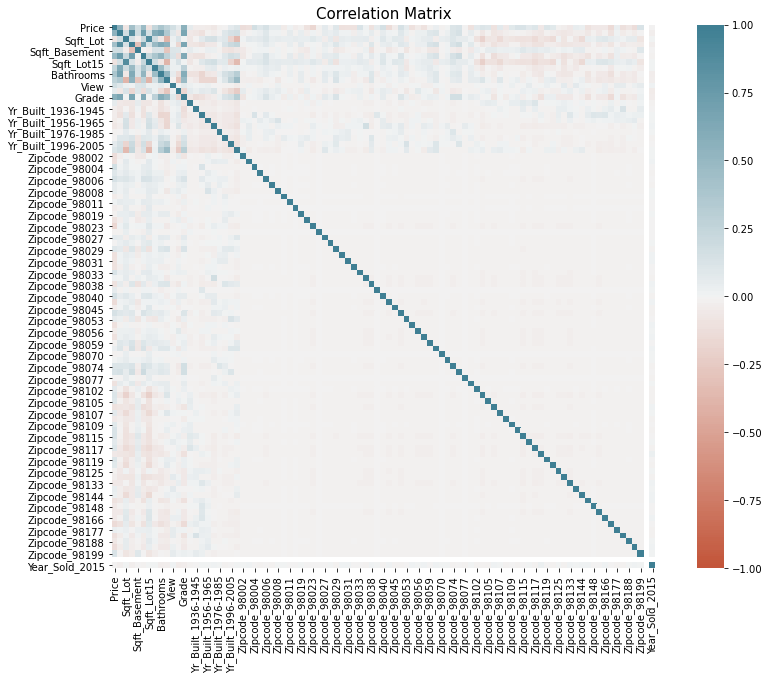

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(preprocessed.corr(), 
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=200), 
            square=True)
plt.title('Correlation Matrix', fontsize=15);

plt.savefig('D:\Data Science\Module_2_Final_Project\Images\corr1.png', bbox_inches='tight');

Looking at the first 20 pairs only.

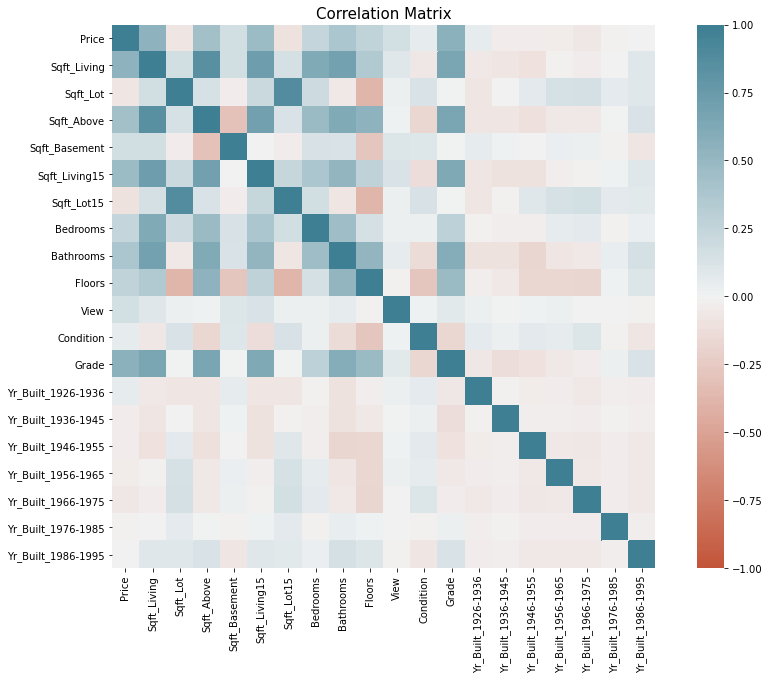

In [99]:
plt.figure(figsize=(15, 10))
sns.heatmap(preprocessed.iloc[:,:20].corr(), 
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=200), 
            square=True)
plt.title('Correlation Matrix', fontsize=15);
plt.savefig('D:\Data Science\Module_2_Final_Project\Images\corr2.png', bbox_inches='tight');

With some code, you can separate the highly correlated pairs. We are using 70% threshold for this model.

### Separating high correlated pairs

In [100]:
df2 = preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)


df2['pairs'] = list(zip(df2.level_0, df2.level_1))

df2.set_index(['pairs'], inplace = True)

df2.drop(columns=['level_1', 'level_0'], inplace = True)

df2.columns = ['cc']

df2.drop_duplicates(inplace=True)

In [101]:
df2[(df2.cc>.7) & (df2.cc <1)]

cc
pairs                                 
(Sqft_Lot15, Sqft_Lot)        0.878122
(Sqft_Above, Sqft_Living)     0.839986
(Sqft_Living, Sqft_Living15)  0.719632
(Sqft_Above, Sqft_Living15)   0.700075

* From the table above, we can see that **Sqft_Lot, Sqft_Lot15, Sqft_Living, Sqft_Living15** and **Sqft_Above** are all highly correlated. 
* Removing **Sqft_Lot15** and **Sqft_Living15** makes sense as houses in the same area with the same square footage will have similar average prices. We are also interested in the price of the actual house more than that of the neighbours so we will remove these. 
* **Sqft_Above** and **Sqft_Living**, are one in the same so being highly correlated makes sense. Houses with larger living area will have larger total area. We will keep **Sqft_Living** as it depicts the total square footage of the house itself.

We will go ahead and remove these variables before moving on to the regression.

In [102]:
prep = preprocessed.drop(labels=['Sqft_Lot15', 'Sqft_Living15', 'Sqft_Above'], axis=1).copy()

In [103]:
prep.iloc[:,:20].corr()

Price  Sqft_Living  Sqft_Lot  Sqft_Basement  Bedrooms  \
Price               1.000000     0.539616 -0.077862       0.173220  0.245143   
Sqft_Living         0.539616     1.000000  0.175407       0.174560  0.611237   
Sqft_Lot           -0.077862     0.175407  1.000000      -0.036136  0.193978   
Sqft_Basement       0.173220     0.174560 -0.036136       1.000000  0.133194   
Bedrooms            0.245143     0.611237  0.193978       0.133194  1.000000   
Bathrooms           0.383103     0.695037 -0.059899       0.126272  0.461561   
Floors              0.258159     0.355238 -0.376308      -0.269522  0.148988   
View                0.160858     0.096722  0.023476       0.114647  0.024468   
Condition           0.055271    -0.065834  0.128059       0.107928  0.023516   
Grade               0.565554     0.650886  0.006227       0.007614  0.288598   
Yr_Built_1926-1936  0.056685    -0.050830 -0.077913       0.060110 -0.021140   
Yr_Built_1936-1945 -0.036129    -0.076662 -0.004949       0.009227 -0.031182   
Yr_Built_1946-1955 -0.038689    -0.104199  0.075383      -0.005541 -0.030435   
Yr_Built_1956-1965 -0.043832    -0.018999  0.141142       0.038578  0.055395   
Yr_Built_1966-1975 -0.068298    -0.032206  0.152765       0.026398  0.071817   
Yr_Built_1976-1985 -0.008878    -0.001181  0.063470      -0.008076 -0.020242   
Yr_Built_1986-1995 -0.005796     0.085984  0.088999      -0.083898  0.036647   
Yr_Built_1996-2005  0.065414     0.144724 -0.182834      -0.091289  0.022208   
Yr_Built_2006-2015  0.110901     0.168309 -0.353149      -0.062704  0.024804   
Zipcode_98002      -0.122485    -0.035359  0.010336      -0.049585  0.012781   

                    Bathrooms    Floors      View  Condition     Grade  \
Price                0.383103  0.258159  0.160858   0.055271  0.565554   
Sqft_Living          0.695037  0.355238  0.096722  -0.065834  0.650886   
Sqft_Lot            -0.059899 -0.376308  0.023476   0.128059  0.006227   
Sqft_Basement        0.126272 -0.269522  0.114647   0.107928  0.007614   
Bedrooms             0.461561  0.148988  0.024468   0.023516  0.288598   
Bathrooms            1.000000  0.528269  0.048222  -0.133174  0.592575   
Floors               0.528269  1.000000 -0.021147  -0.269819  0.478170   
View                 0.048222 -0.021147  1.000000   0.020596  0.083435   
Condition           -0.133174 -0.269819  0.020596   1.000000 -0.167157   
Grade                0.592575  0.478170  0.083435  -0.167157  1.000000   
Yr_Built_1926-1936  -0.087401 -0.027803  0.026372   0.067481 -0.064582   
Yr_Built_1936-1945  -0.101508 -0.053823  0.005450   0.026388 -0.119774   
Yr_Built_1946-1955  -0.174345 -0.171825  0.013294   0.077214 -0.105612   
Yr_Built_1956-1965  -0.071777 -0.158460  0.030878   0.052959 -0.049726   
Yr_Built_1966-1975  -0.054592 -0.175891 -0.005233   0.111763 -0.031898   
Yr_Built_1976-1985   0.046290  0.008752 -0.004856  -0.011746  0.026762   
Yr_Built_1986-1995   0.148909  0.114723 -0.015474  -0.083690  0.122347   
Yr_Built_1996-2005   0.210333  0.274774 -0.019894  -0.154849  0.164858   
Yr_Built_2006-2015   0.320309  0.472738 -0.040013  -0.234840  0.304336   
Zipcode_98002       -0.026555 -0.023629 -0.022349   0.052940 -0.081797   

                    Yr_Built_1926-1936  Yr_Built_1936-1945  \
Price                         0.056685           -0.036129   
Sqft_Living                  -0.050830           -0.076662   
Sqft_Lot                     -0.077913           -0.004949   
Sqft_Basement                 0.060110            0.009227   
Bedrooms                     -0.021140           -0.031182   
Bathrooms                    -0.087401           -0.101508   
Floors                       -0.027803           -0.053823   
View                          0.026372            0.005450   
Condition                     0.067481            0.026388   
Grade                        -0.064582           -0.119774   
Yr_Built_1926-1936            1.000000           -0.022473   
Yr_Built_1936-1945           -0.022473     

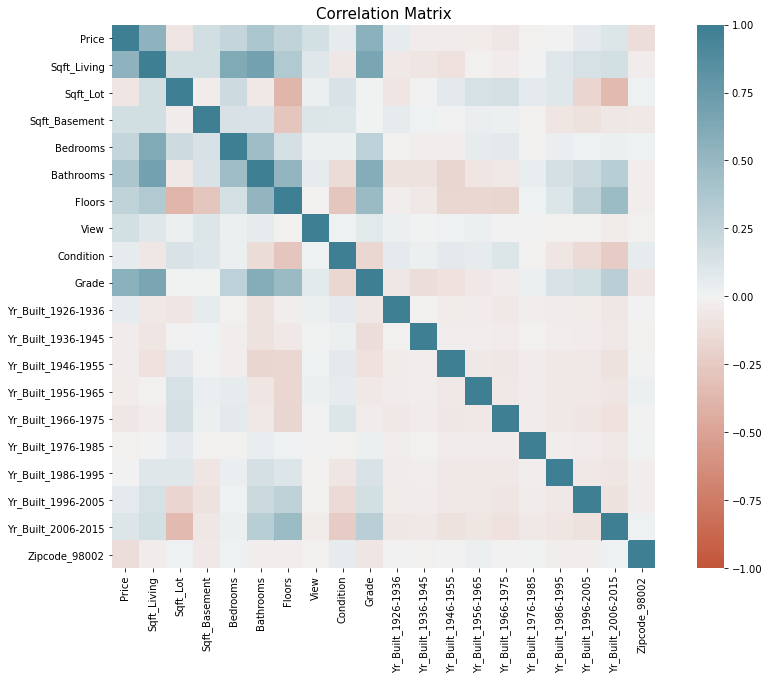

In [104]:
plt.figure(figsize=(15, 10))
sns.heatmap(prep.iloc[:,:20].corr(), 
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=200), 
            square=True)
plt.title('Correlation Matrix', fontsize=15);
plt.savefig('D:\Data Science\Module_2_Final_Project\Images\corr3.png', bbox_inches='tight');

### Running the correlation matrix again

In [105]:
df3 = prep.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df3['pairs'] = list(zip(df3.level_0, df3.level_1))

df3.set_index(['pairs'], inplace = True)

df3.drop(columns=['level_1', 'level_0'], inplace = True)

df3.columns = ['cc']

df3.drop_duplicates(inplace=True)

In [106]:
df3[(df3.cc>.7) & (df3.cc <1)]

Empty DataFrame
Columns: [cc]
Index: []

Our data seems to be good for multicollinearity of less than .7

In [107]:
prep.head()

Price  Sqft_Living  Sqft_Lot  Sqft_Basement  Bedrooms  \
Id                                                                     
7129300520  221900.0         1180      5650            0.0         3   
6414100192  538000.0         2570      7242            1.0         3   
5631500400  180000.0          770     10000            0.0         2   
2487200875  604000.0         1960      5000            1.0         4   
1954400510  510000.0         1680      8080            0.0         3   

            Bathrooms  Floors  View  Condition  Grade  ...  Zipcode_98155  \
Id                                                     ...                  
7129300520       1.00     1.0   0.0          3      7  ...              0   
6414100192       2.25     2.0   0.0          3      7  ...              0   
5631500400       1.00     1.0   0.0          3      6  ...              0   
2487200875       3.00     1.0   0.0          5      7  ...              0   
1954400510       2.00     1.0   0.0          3      8  ...              0   

            Zipcode_98166  Zipcode_98168  Zipcode_98177  Zipcode_98178  \
Id                                                                       
7129300520              0              0              0              1   
6414100192              0              0              0              0   
5631500400              0              0              0              0   
2487200875              0              0              0              0   
1954400510              0              0              0              0   

            Zipcode_98188  Zipcode_98198  Zipcode_98199  Waterfront_1.0  \
Id                                                                        
7129300520              0              0              0               0   
6414100192              0              0              0               0   
5631500400              0              0              0               0   
2487200875              0              0              0               0   
1954400510              0              0              0               0   

            Year_Sold_2015  
Id                          
7129300520               0  
6414100192               0  
5631500400               1  
2487200875               0  
1954400510               1  

[5 rows x 90 columns]

Let's check the distribution of our final dataframe. 

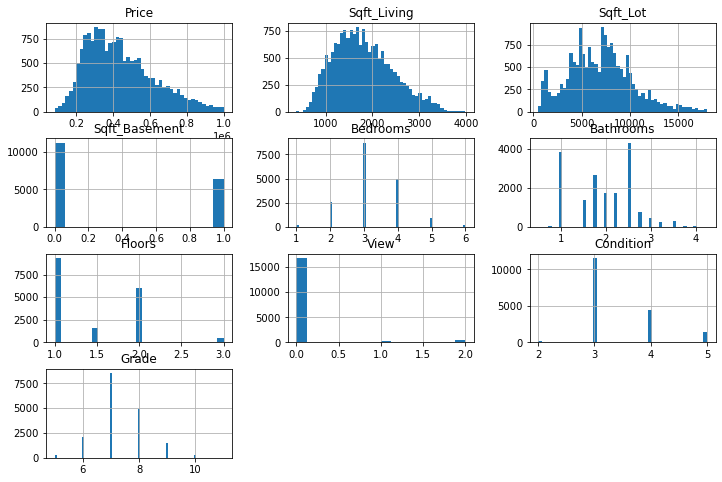

In [108]:
prep.iloc[:,:10].hist(figsize=(12,8), bins='auto');

Although clean, almost all of these plots need to be log transformed to make the distribution more normal.

### Log Transformation

In [109]:
log_column = ['Sqft_Living', 'Sqft_Lot', 'Bedrooms', 'Bathrooms', 'Floors', 'Condition', 'Grade']
log_df = prep.copy()

In [110]:
for i in log_column:
    log_df[i] = log_df[i].map(lambda x: np.log(x))

In [111]:
log_df.head()

Price  Sqft_Living  Sqft_Lot  Sqft_Basement  Bedrooms  \
Id                                                                     
7129300520  221900.0     7.073270  8.639411            0.0  1.098612   
6414100192  538000.0     7.851661  8.887653            1.0  1.098612   
5631500400  180000.0     6.646391  9.210340            0.0  0.693147   
2487200875  604000.0     7.580700  8.517193            1.0  1.386294   
1954400510  510000.0     7.426549  8.997147            0.0  1.098612   

            Bathrooms    Floors  View  Condition     Grade  ...  \
Id                                                          ...   
7129300520   0.000000  0.000000   0.0   1.098612  1.945910  ...   
6414100192   0.810930  0.693147   0.0   1.098612  1.945910  ...   
5631500400   0.000000  0.000000   0.0   1.098612  1.791759  ...   
2487200875   1.098612  0.000000   0.0   1.609438  1.945910  ...   
1954400510   0.693147  0.000000   0.0   1.098612  2.079442  ...   

            Zipcode_98155  Zipcode_98166  Zipcode_98168  Zipcode_98177  \
Id                                                                       
7129300520              0              0              0              0   
6414100192              0              0              0              0   
5631500400              0              0              0              0   
2487200875              0              0              0              0   
1954400510              0              0              0              0   

            Zipcode_98178  Zipcode_98188  Zipcode_98198  Zipcode_98199  \
Id                                                                       
7129300520              1              0              0              0   
6414100192              0              0              0              0   
5631500400              0              0              0              0   
2487200875              0              0              0              0   
1954400510              0              0              0              0   

            Waterfront_1.0  Year_Sold_2015  
Id                                          
7129300520               0               0  
6414100192               0               0  
5631500400               0               1  
2487200875               0               0  
1954400510               0               1  

[5 rows x 90 columns]

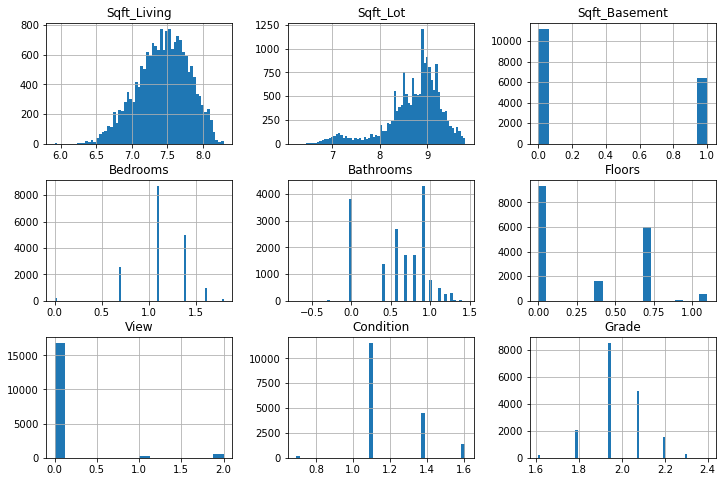

In [112]:
log_df.iloc[:,1:10].hist(figsize=(12,8), bins='auto');

### Step 4: Run the base model

### Base Model

In [113]:
import statsmodels.api as sm

X = log_df.drop('Price', axis=1)
y = log_df['Price']

X_cons = sm.add_constant(X)

model = sm.OLS(y,X_cons).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     859.5
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        02:58:24   Log-Likelihood:            -2.2355e+05
No. Observations:               17593   AIC:                         4.473e+05
Df Residuals:                   17504   BIC:                         4.480e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.297e+06    2.3e+04    -99.712      0.000   -2.34e+06   -2.25e+06
Sqft_Living         1.966e+05   3534.494     55.613      0.000     1.9e+05    2.03e+05
Sqft_Lot             4.93e+04   1886.000     26.141      0.000    4.56e+04     5.3e+04
Sqft_Basement      -2.022e+04   1678.863    -12.044      0.000   -2.35e+04   -1.69e+04
Bedrooms           -1.663e+04   3023.774     -5.501      0.000   -2.26e+04   -1.07e+04
Bathrooms            481.1693   2728.461      0.176      0.860   -4866.885    5829.224
Floors              5585.4252   3034.497      1.841      0.066    -362.490    1.15e+04
View                3.595e+04   1712.133     20.995      0.000    3.26e+04    3.93e+04
Condition           6.923e+04   3783.764     18.297      0.000    6.18e+04    7.66e+04
Grade               2.912e+05   7725.010     37.694      0.000    2.76e+05    3.06e+05
Yr_Built_1926-1936  2.432e+04   3764.316      6.462      0.000    1.69e+04    3.17e+04
Yr_Built_1936-1945  1152.9622   4844.039      0.238      0.812   -8341.837    1.06e+04
Yr_Built_1946-1955  -1.94e+04   2958.324     -6.559      0.000   -2.52e+04   -1.36e+04
Yr_Built_1956-1965 -1.952e+04   2988.186     -6.531      0.000   -2.54e+04   -1.37e+04
Yr_Built_1966-1975 -8962.8777   2558.294     -3.503      0.000    -1.4e+04   -3948.367
Yr_Built_1976-1985  -487.7995   4556.187     -0.107      0.915   -9418.380    8442.781
Yr_Built_1986-1995 -3304.5190   3097.923     -1.067      0.286   -9376.757    2767.719
Yr_Built_1996-2005  8056.0312   3017.405      2.670      0.008    2141.617     1.4e+04
Yr_Built_2006-2015  2.677e+04   2562.475     10.446      0.000    2.17e+04    3.18e+04
Zipcode_98002        2.57e+04   7366.289      3.489      0.000    1.13e+04    4.01e+04
Zipcode_98003       8226.8463   6768.892      1.215      0.224   -5040.856    2.15e+04
Zipcode_98004       5.319e+05   8925.234     59.592      0.000    5.14e+05    5.49e+05
Zipcode_98005       3.555e+05   9609.518     36.992      0.000    3.37e+05    3.74e+05
Zipcode_98006       2.999e+05   6609.479     45.381      0.000    2.87e+05    3.13e+05
Zipcode_98007       2.738e+05   8452.789     32.387      0.000    2.57e+05     2.9e+05
Zipcode_98008       2.616e+05   7105.801     36.820      0.000    2.48e+05    2.76e+05
Zipcode_98010       7.614e+04   1.34e+04      5.681      0.000    4.99e+04    1.02e+05
Zipcode_98011       1.725e+05   7715.323     22.359      0.000    1.57e+05    1.88e+05
Zipcode_98014       9.467e+04    1.4e+04      6.763      0.000    6.72e+04    1.22e+05
Zipcode_98019       1.071e+05   8350.518     12.830      0.000    9.08e+04    1.24e+05
Zipcode_98022       1.688e+04   8318.215      2.030      0.042     580.149    3.32e+04
Zipcode_98023       2670.2796   5979.269      0.447      0.655   -9049.683    1.44e+04
Zipcode_98024       1.405e+05   1.77e+

The base model looks to be pretty good. We have a R-squared of 0.812 which means that this model is able to explain 81.2% of the variability present in the data.

However, we can also see p-values greater that 0.05 for some predictors. This indicates that at a confidence level of 95%, some of these predictors are not significant to this model.

We can use Stepwise selection to decide what to include and what not to include in our model.

### Stepwise Selection

In [158]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
   
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [115]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [116]:
X = log_df.drop('Price', axis=1)
y = log_df['Price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  Bathrooms                      with p-value 0.0
Add  Grade                          with p-value 0.0
Add  Sqft_Living                    with p-value 8.35841e-280
Add  Zipcode_98023                  with p-value 4.35814e-177
Add  Zipcode_98004                  with p-value 3.019e-135
Add  Zipcode_98115                  with p-value 1.14199e-132
Add  Zipcode_98117                  with p-value 8.38977e-130
Add  Zipcode_98103                  with p-value 2.3248e-139
Add  Zipcode_98040                  with p-value 6.65349e-113
Add  Zipcode_98042                  with p-value 9.20516e-111
Add  Zipcode_98092                  with p-value 9.66457e-119
Add  Zipcode_98038                  with p-value 4.47962e-113
Add  Zipcode_98003                  with p-value 1.97141e-118
Add  Zipcode_98112                  with p-value 2.46349e-106
Add  Zipcode_98199                  with p-value 7.15044e-111
Add  Zipcode_98119                  with p-value 2.59706e-106
Add  Zipcode_98033           

In [117]:
result.sort()

###  Base model II

In [118]:
X_fin = X[result]
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     993.9
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        03:00:37   Log-Likelihood:            -2.2357e+05
No. Observations:               17593   AIC:                         4.473e+05
Df Residuals:                   17516   BIC:                         4.479e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.283e+06   2.09e+04   -109.322      0.000   -2.32e+06   -2.24e+06
Bedrooms           -1.603e+04   2996.073     -5.352      0.000   -2.19e+04   -1.02e+04
Condition           7.007e+04   3743.020     18.720      0.000    6.27e+04    7.74e+04
Grade               2.912e+05   7519.772     38.725      0.000    2.76e+05    3.06e+05
Sqft_Basement      -2.184e+04   1449.816    -15.065      0.000   -2.47e+04    -1.9e+04
Sqft_Living         1.992e+05   3089.056     64.495      0.000    1.93e+05    2.05e+05
Sqft_Lot            4.722e+04   1677.778     28.147      0.000    4.39e+04    5.05e+04
View                3.591e+04   1711.156     20.987      0.000    3.26e+04    3.93e+04
Year_Sold_2015      1.973e+04   1289.645     15.302      0.000    1.72e+04    2.23e+04
Yr_Built_1926-1936  2.457e+04   3746.177      6.559      0.000    1.72e+04    3.19e+04
Yr_Built_1946-1955  -2.01e+04   2919.951     -6.882      0.000   -2.58e+04   -1.44e+04
Yr_Built_1956-1965 -2.008e+04   2959.768     -6.785      0.000   -2.59e+04   -1.43e+04
Yr_Built_1966-1975 -9338.7260   2514.693     -3.714      0.000   -1.43e+04   -4409.677
Yr_Built_1996-2005  8859.0123   2945.550      3.008      0.003    3085.441    1.46e+04
Yr_Built_2006-2015  2.765e+04   2474.054     11.175      0.000    2.28e+04    3.25e+04
Zipcode_98004       5.165e+05   7780.025     66.392      0.000    5.01e+05    5.32e+05
Zipcode_98005       3.397e+05   8547.606     39.741      0.000    3.23e+05    3.56e+05
Zipcode_98006       2.845e+05   4956.920     57.398      0.000    2.75e+05    2.94e+05
Zipcode_98007       2.583e+05   7222.712     35.757      0.000    2.44e+05    2.72e+05
Zipcode_98008       2.457e+05   5573.813     44.078      0.000    2.35e+05    2.57e+05
Zipcode_98010       6.045e+04   1.27e+04      4.776      0.000    3.56e+04    8.53e+04
Zipcode_98011       1.572e+05   6371.435     24.675      0.000    1.45e+05     1.7e+05
Zipcode_98014        7.98e+04   1.33e+04      5.994      0.000    5.37e+04    1.06e+05
Zipcode_98019        9.22e+04   7136.879     12.919      0.000    7.82e+04    1.06e+05
Zipcode_98023      -1.296e+04   4083.517     -3.173      0.002    -2.1e+04   -4951.354
Zipcode_98024       1.256e+05   1.72e+04      7.308      0.000    9.19e+04    1.59e+05
Zipcode_98027       2.559e+05   5671.804     45.114      0.000    2.45e+05    2.67e+05
Zipcode_98028       1.347e+05   5595.127     24.069      0.000    1.24e+05    1.46e+05
Zipcode_98029       2.496e+05   5165.489     48.324      0.000    2.39e+05     2.6e+05
Zipcode_98033       3.138e+05   4938.173     63.554      0.000    3.04e+05    3.24e+05
Zipcode_98034        1.86e+05   4102.690     45.340      0.000    1.78e+05    1.94e+05
Zipcode_98038       3.473e+04   4091.746      8.487      0.000    2.67e+04    4.27e+04
Zipcode_98039       6.887e+05   2.44e+

The model summary still show a R-square of 0.812, even though we removed predictors with p-values greater than 0.05. This means that our model is performing well.

We can now go and cross-validate the model to check for underfitting or overfitting.

### Cross-Validation

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print(mse_train)
print(mse_test)

6433676793.12766
6200809082.890611


In [120]:
def kfolds(data, k):
    
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [121]:
data = pd.concat([X, y], axis=1)
folds = kfolds(data, 5)

In [122]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(folds) if i!=n])
    test = folds[n]
    # Fit a linear regression model
    linreg.fit(X_train, y_train)
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[6433676793.127677, 6433676793.127677, 6433676793.127677, 6433676793.127677, 6433676793.127677]
[6200809082.89062, 6200809082.89062, 6200809082.89062, 6200809082.89062, 6200809082.89062]


In [123]:
print('Train MSE:')
print(train_errs)
print('Train RMSE:')
print(np.sqrt(train_errs), '\n')
print('Test MSE:')
print(test_errs)
print('Test RMSE:')
print(np.sqrt(test_errs))

Train MSE:
[6433676793.127677, 6433676793.127677, 6433676793.127677, 6433676793.127677, 6433676793.127677]
Train RMSE:
[80210.20379682 80210.20379682 80210.20379682 80210.20379682
 80210.20379682] 

Test MSE:
[6200809082.89062, 6200809082.89062, 6200809082.89062, 6200809082.89062, 6200809082.89062]
Test RMSE:
[78745.21625401 78745.21625401 78745.21625401 78745.21625401
 78745.21625401]


The test error is slightly higher or lower (depending on the split) than our train error. This confirms that the model is a good fit. We can use this as our final model.

### Final Model

In [124]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     993.9
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        03:00:38   Log-Likelihood:            -2.2357e+05
No. Observations:               17593   AIC:                         4.473e+05
Df Residuals:                   17516   BIC:                         4.479e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.283e+06   2.09e+04   -109.322      0.000   -2.32e+06   -2.24e+06
Bedrooms           -1.603e+04   2996.073     -5.352      0.000   -2.19e+04   -1.02e+04
Condition           7.007e+04   3743.020     18.720      0.000    6.27e+04    7.74e+04
Grade               2.912e+05   7519.772     38.725      0.000    2.76e+05    3.06e+05
Sqft_Basement      -2.184e+04   1449.816    -15.065      0.000   -2.47e+04    -1.9e+04
Sqft_Living         1.992e+05   3089.056     64.495      0.000    1.93e+05    2.05e+05
Sqft_Lot            4.722e+04   1677.778     28.147      0.000    4.39e+04    5.05e+04
View                3.591e+04   1711.156     20.987      0.000    3.26e+04    3.93e+04
Year_Sold_2015      1.973e+04   1289.645     15.302      0.000    1.72e+04    2.23e+04
Yr_Built_1926-1936  2.457e+04   3746.177      6.559      0.000    1.72e+04    3.19e+04
Yr_Built_1946-1955  -2.01e+04   2919.951     -6.882      0.000   -2.58e+04   -1.44e+04
Yr_Built_1956-1965 -2.008e+04   2959.768     -6.785      0.000   -2.59e+04   -1.43e+04
Yr_Built_1966-1975 -9338.7260   2514.693     -3.714      0.000   -1.43e+04   -4409.677
Yr_Built_1996-2005  8859.0123   2945.550      3.008      0.003    3085.441    1.46e+04
Yr_Built_2006-2015  2.765e+04   2474.054     11.175      0.000    2.28e+04    3.25e+04
Zipcode_98004       5.165e+05   7780.025     66.392      0.000    5.01e+05    5.32e+05
Zipcode_98005       3.397e+05   8547.606     39.741      0.000    3.23e+05    3.56e+05
Zipcode_98006       2.845e+05   4956.920     57.398      0.000    2.75e+05    2.94e+05
Zipcode_98007       2.583e+05   7222.712     35.757      0.000    2.44e+05    2.72e+05
Zipcode_98008       2.457e+05   5573.813     44.078      0.000    2.35e+05    2.57e+05
Zipcode_98010       6.045e+04   1.27e+04      4.776      0.000    3.56e+04    8.53e+04
Zipcode_98011       1.572e+05   6371.435     24.675      0.000    1.45e+05     1.7e+05
Zipcode_98014        7.98e+04   1.33e+04      5.994      0.000    5.37e+04    1.06e+05
Zipcode_98019        9.22e+04   7136.879     12.919      0.000    7.82e+04    1.06e+05
Zipcode_98023      -1.296e+04   4083.517     -3.173      0.002    -2.1e+04   -4951.354
Zipcode_98024       1.256e+05   1.72e+04      7.308      0.000    9.19e+04    1.59e+05
Zipcode_98027       2.559e+05   5671.804     45.114      0.000    2.45e+05    2.67e+05
Zipcode_98028       1.347e+05   5595.127     24.069      0.000    1.24e+05    1.46e+05
Zipcode_98029       2.496e+05   5165.489     48.324      0.000    2.39e+05     2.6e+05
Zipcode_98033       3.138e+05   4938.173     63.554      0.000    3.04e+05    3.24e+05
Zipcode_98034        1.86e+05   4102.690     45.340      0.000    1.78e+05    1.94e+05
Zipcode_98038       3.473e+04   4091.746      8.487      0.000    2.67e+04    4.27e+04
Zipcode_98039       6.887e+05   2.44e+

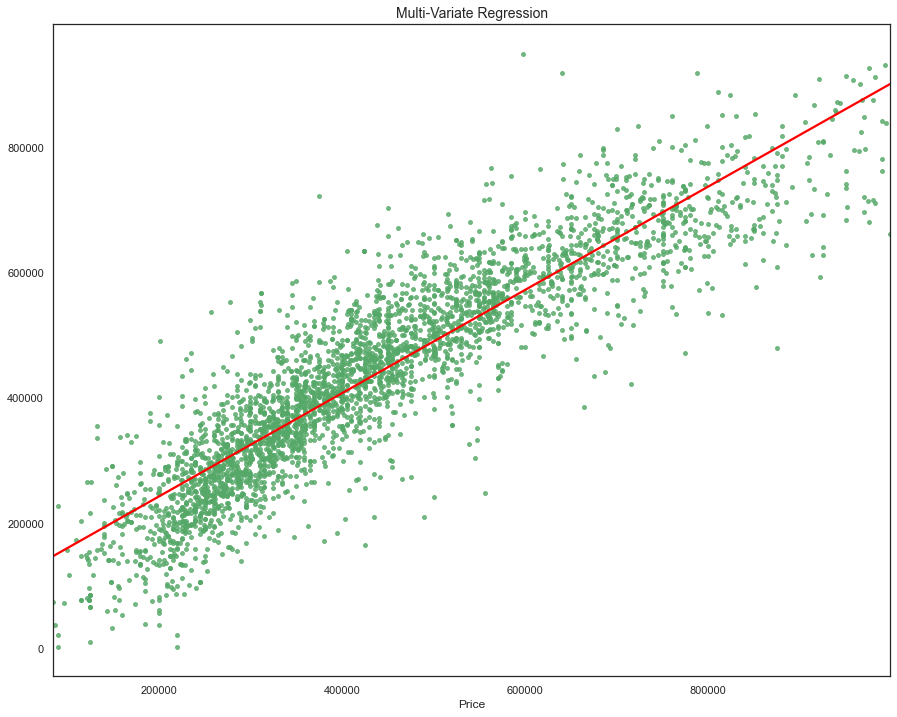

In [125]:
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,12))
sns.set(style='white', color_codes=True)
sns.regplot(y_test, y=y_hat_test, ci=None,  scatter_kws={'s': 15, 'color':'g'}, line_kws={'color': 'red'})

plt.title('Multi-Variate Regression', fontsize=14)
plt.savefig(r'D:\Data Science\Module_2_Final_Project\Images\regression.png', bbox_inches='tight');

The line of best fit is plotted pretty well in our data. This confirms that our model has worked and will predict price of the houses accurately.

Let's now check the coefficients of each predictor that adds or subtracts the value of a house.

### Step 5: Extract the coefficients

### Coefficients

In [126]:
coefficients = pd.DataFrame(model.params)

In [127]:
coefficients

0
const         -2.282660e+06
Bedrooms      -1.603361e+04
Condition      7.006841e+04
Grade          2.912007e+05
Sqft_Basement -2.184095e+04
...                     ...
Zipcode_98177  2.180078e+05
Zipcode_98178  6.504919e+04
Zipcode_98188  3.448682e+04
Zipcode_98198  2.618073e+04
Zipcode_98199  3.783823e+05

[77 rows x 1 columns]

In [128]:
coefficients.iloc[:20]

0
const              -2.282660e+06
Bedrooms           -1.603361e+04
Condition           7.006841e+04
Grade               2.912007e+05
Sqft_Basement      -2.184095e+04
Sqft_Living         1.992273e+05
Sqft_Lot            4.722496e+04
View                3.591177e+04
Year_Sold_2015      1.973478e+04
Yr_Built_1926-1936  2.457081e+04
Yr_Built_1946-1955 -2.009601e+04
Yr_Built_1956-1965 -2.008227e+04
Yr_Built_1966-1975 -9.338726e+03
Yr_Built_1996-2005  8.859012e+03
Yr_Built_2006-2015  2.764665e+04
Zipcode_98004       5.165342e+05
Zipcode_98005       3.396883e+05
Zipcode_98006       2.845190e+05
Zipcode_98007       2.582633e+05
Zipcode_98008       2.456810e+05

We can perform reverse log to calculate dollar impact for each predictor.

### Reverse Log

In [129]:
coef = coefficients.transpose()

In [130]:
coef

const      Bedrooms     Condition          Grade  Sqft_Basement  \
0 -2.282660e+06 -16033.608268  70068.413902  291200.698726  -21840.945064   

     Sqft_Living      Sqft_Lot         View  Year_Sold_2015  \
0  199227.336025  47224.958015  35911.77214    19734.779435   

   Yr_Built_1926-1936  ...  Zipcode_98146  Zipcode_98148  Zipcode_98155  \
0        24570.805518  ...   99759.593267   58375.918664  144416.810483   

   Zipcode_98166  Zipcode_98168  Zipcode_98177  Zipcode_98178  Zipcode_98188  \
0  100300.467512   56117.348697  218007.799524   65049.194785   34486.816276   

   Zipcode_98198  Zipcode_98199  
0    26180.73046  378382.347061  

[1 rows x 77 columns]

In [131]:
round(coef.const,2)

0   -2282659.55
Name: const, dtype: float64

In [132]:
coef.columns[1:10]

Index(['Bedrooms', 'Condition', 'Grade', 'Sqft_Basement', 'Sqft_Living',
       'Sqft_Lot', 'View', 'Year_Sold_2015', 'Yr_Built_1926-1936'],
      dtype='object')

#### Bedrooms

In [133]:
Bedrooms = [1,2,3,4,5,6]

for i in Bedrooms:
    coeff = coef.Bedrooms * np.log(i)
    print(i, 'Bedrooms: ', '$', round(coeff[0],2))

1 Bedrooms:  $ -0.0
2 Bedrooms:  $ -11113.65
3 Bedrooms:  $ -17614.72
4 Bedrooms:  $ -22227.3
5 Bedrooms:  $ -25805.1
6 Bedrooms:  $ -28728.37


#### Condition

In [134]:
Condition = [2,3,4,5]

for i in Condition:
    coeff = coef.Condition * np.log(i)
    print(i, ': ', '$', round(coeff[0],2))

2 :  $ 48567.72
3 :  $ 76978.02
4 :  $ 97135.45
5 :  $ 112770.76


#### Grade

In [135]:
Grade = [5,6,7,8,9,10,11]

for i in Grade:
    coeff = coef.Grade * np.log(i)
    print(i,': ', '$', round(coeff[0],2))

5 :  $ 468669.44
6 :  $ 521761.61
7 :  $ 566650.4
8 :  $ 605534.83
9 :  $ 639833.33
10 :  $ 670514.39
11 :  $ 698268.78


#### Sqft_Living

In [136]:
living = [1, 2, 3, 4, 5]

for i in living:
    coeff = coef.Sqft_Living * np.log(i)
    print(i*1000, 'sqft: ', '$', round(coeff[0],2))

1000 sqft:  $ 0.0
2000 sqft:  $ 138093.87
3000 sqft:  $ 218873.6
4000 sqft:  $ 276187.73
5000 sqft:  $ 320644.03


#### Sqft_Lot

In [137]:
lot = [10, 15, 20, 25, 30]

for i in lot:
    coeff = coef.Sqft_Lot * np.log(i)
    print(i*1000, 'sqft: ', '$', round(coeff[0],2))

10000 sqft:  $ 108739.48
15000 sqft:  $ 127887.56
20000 sqft:  $ 141473.33
25000 sqft:  $ 152011.28
30000 sqft:  $ 160621.4


We can sort the zipcode coefficients to find location based values in King County.

#### Zipcodes

In [138]:
zipcodes = coefficients.loc['Zipcode_98004':'Zipcode_98199']

In [139]:
zipcodes

0
Zipcode_98004  516534.249900
Zipcode_98005  339688.293205
Zipcode_98006  284518.973640
Zipcode_98007  258263.306174
Zipcode_98008  245681.024249
...                      ...
Zipcode_98177  218007.799524
Zipcode_98178   65049.194785
Zipcode_98188   34486.816276
Zipcode_98198   26180.730460
Zipcode_98199  378382.347061

[62 rows x 1 columns]

Sort values to slice the top five zipcodes with the highest coefficients.

In [140]:
top_5_zipcodes = zipcodes.sort_values(by=0, ascending=False)[:5]
top_5_zipcodes

0
Zipcode_98039  688732.484156
Zipcode_98004  516534.249900
Zipcode_98112  449852.151620
Zipcode_98102  447388.757401
Zipcode_98109  443946.307920

Sort values to slice the worst five zipcodes with the lowest coefficients.

In [141]:
least_5_zipcodes = zipcodes.sort_values(by=0, ascending=True)[:5]
least_5_zipcodes

0
Zipcode_98092 -20279.890300
Zipcode_98023 -12955.454147
Zipcode_98198  26180.730460
Zipcode_98188  34486.816276
Zipcode_98038  34726.239765

### EDA 2: Effect of location on House Price

From the above tables, we can see the 5 most and least desirable neighborhoods in King County. Let's plot this on a map using folium to get a visual representation.

We need latitudes and longitudes to use the folium.Map function. 

In [143]:
location_df = df_raw[['Zipcode', 'Lat', 'Long']]
location_df

Zipcode      Lat     Long
0        98178  47.5112 -122.257
1        98125  47.7210 -122.319
2        98028  47.7379 -122.233
3        98136  47.5208 -122.393
4        98074  47.6168 -122.045
...        ...      ...      ...
21592    98103  47.6993 -122.346
21593    98146  47.5107 -122.362
21594    98144  47.5944 -122.299
21595    98027  47.5345 -122.069
21596    98144  47.5941 -122.299

[21597 rows x 3 columns]

Collect latitudes and longitudes for all houses in top 5 zipcodes.

In [144]:
top_5 = [98039, 98004, 98112, 98102, 98109]

lat = []
long = []

for i in range(len(location_df)):
    if location_df.Zipcode.iloc[i] in top_5:
        lat.append(location_df.Lat[i])
        long.append(location_df.Long[i])
        
location_best = list(zip(lat, long))

Same for the worst 5.

In [145]:
worst_5 = [98092, 98023, 98198, 98188, 98038]

lat = []
long = []

for i in range(len(location_df)):
    if location_df.Zipcode.iloc[i] in worst_5:
        lat.append(location_df.Lat[i])
        long.append(location_df.Long[i])

location_worst = list(zip(lat, long))

In [146]:
len(location_worst)

1855

In [147]:
import folium

kc_map = folium.Map(location=[47.6, -122.2], zoom_start=10)

In [148]:
kc_map

In [149]:
for lat, long in location_best:
    folium.CircleMarker(location=[lat, long], 
                        radius=1,
                        fill=True,
                        color='blue').add_to(kc_map)
    
for lat, long in location_worst:
    folium.CircleMarker(location=[lat, long],
                        radius=1, 
                        fill=True,
                        color='red').add_to(kc_map)

In [150]:
kc_map

In [151]:
coefficients

0
const         -2.282660e+06
Bedrooms      -1.603361e+04
Condition      7.006841e+04
Grade          2.912007e+05
Sqft_Basement -2.184095e+04
...                     ...
Zipcode_98177  2.180078e+05
Zipcode_98178  6.504919e+04
Zipcode_98188  3.448682e+04
Zipcode_98198  2.618073e+04
Zipcode_98199  3.783823e+05

[77 rows x 1 columns]

### EDA 3: Key factors that drive house price / Conclusion

Based on the regression, our final model shows some meaningful relationships on how different variables affect the overall **Price** of a house. With an overall coefficient of **- $228k**, each of the characterstic's coefficients are added in multiples of their respective quantity, in order to give the final price of a house.

The following characterstics have a positive relationship with Price and helps increase the value of a home.
* Sqft Living 
* Sqft Lot 
* Condition of the house 
* Grade of the house 
* Year Built before 1935
* Premium locations (Zipcode)

**Number of Bedrooms** show a negative coefficient in the model. This could be because the model calculates the coefficients considering all factors that lead to a final price of a house. Thus when factoring for Bedroooms is coming up to be negative in terms of price action. Fundamentally, our model suggests that higher number of Bedrooms in the same location with similar Sqft Living, Sqft Lot, Condition, Grade, etc is considered to decrease the value of a home. **- $16k**

**Houses built before the year of 1945** seem to have a positive relationship with Price. It can be explained that these houses might have been preserving their value since they are over 50 years of age and are considered 'historic'. The **houses after 1945** have a decreasing negative relationship with Price, which confirms the market notion that old houses have lesser value than the new ones. 

The relationship between different **Zipcodes** and Price shows the overall distribution of expensive houses to cheaper ones in King County. The top 5 zipcodes with the highest home values are as follows:
* Zipcode_98039	
* Zipcode_98004
* Zipcode_98112	
* Zipcode_98102	
* Zipcode_98109

While the least desirable zipcodes are as follows:
* Zipcode_98092	
* Zipcode_98023	
* Zipcode_98198	
* Zipcode_98188	
* Zipcode_98038

### Step 6: Predict the price

### Predict House Price

In [152]:
params = coefficients.transpose()
params

const      Bedrooms     Condition          Grade  Sqft_Basement  \
0 -2.282660e+06 -16033.608268  70068.413902  291200.698726  -21840.945064   

     Sqft_Living      Sqft_Lot         View  Year_Sold_2015  \
0  199227.336025  47224.958015  35911.77214    19734.779435   

   Yr_Built_1926-1936  ...  Zipcode_98146  Zipcode_98148  Zipcode_98155  \
0        24570.805518  ...   99759.593267   58375.918664  144416.810483   

   Zipcode_98166  Zipcode_98168  Zipcode_98177  Zipcode_98178  Zipcode_98188  \
0  100300.467512   56117.348697  218007.799524   65049.194785   34486.816276   

   Zipcode_98198  Zipcode_98199  
0    26180.73046  378382.347061  

[1 rows x 77 columns]

In [153]:
random_house = prep.sample()
Id = random_house.index[0]
random_house.transpose().sort_values(by=Id, ascending=False)[:15]

Id             7000100850
Price           569000.00
Sqft_Lot          7890.00
Sqft_Living       1230.00
Grade                7.00
Bedrooms             4.00
Condition            4.00
Bathrooms            1.75
Floors               1.00
View                 1.00
Sqft_Basement        1.00
Zipcode_98004        1.00
Zipcode_98103        0.00
Zipcode_98115        0.00
Zipcode_98112        0.00
Zipcode_98109        0.00

In [157]:
predicted_house = params.const + \
    (params.Sqft_Lot * np.log(random_house.Sqft_Lot.values[0])) + \
    (params.Sqft_Living * np.log(random_house.Sqft_Living.values[0])) + \
    (params.Grade * np.log(random_house.Grade.values[0])) + \
    (params.Bedrooms * np.log(random_house.Bedrooms.values[0])) + \
    (params.Condition * np.log(random_house.Condition.values[0])) + \
    (params.Zipcode_98004 * 1) + \
    (params.Sqft_Basement * 1) + \
    (params['Yr_Built_2006-2015'] * 0) + \
    (params.Year_Sold_2015 * 0)

print('Actual Price: ', round(random_house.Price.values[0]))
print('Predicted Price: ', round(predicted_house[0]))

Actual Price:  569000
Predicted Price:  694815
